<a href="https://colab.research.google.com/github/daz261/SocialGraphs/blob/main/Explainer_Notebook_Template_Daria_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link to the Website: https://arturprzybysz.github.io/posts/projectintro/ 
# Link to the Github repo: https://github.com/daz261/SocialGraphs

## 1. Motivation

### 1.1 Dataset
The dataset we use is combined from multiple sources, where Wikipedia plays the main role and other are used to enrich the primary dataset.

### A. Primary data source
The core part of the dataset is downloaded from the Wikipedia. Using the Wikipedia API, we have gathered data on music artists from 1990-1999 including:

1. Album release date

2. Data about the artist: genre, years active, labels

3. Collaborations between artists on the same album

Determining whether a hyperlink on an artist's wik counts as a collaboration was not trivial. Apart from links to potential collaborators, some of these in-page links include references to song writers (for example if album includes a cover), sources of inspiration, former band members etc. In order to filter these references out, wesplit each whole artist string by key symbols such as “&”, “,”, and “Featuring”, then did a few edits for when this heuristic failed. However, the accuracy of our identified collaborations is not 100%, which is why later on in our analysis we compared it with data from secondary sources. The code used to download the Wiki data can be found at: [TODO:link to code] and its output is available [TODO:link to download artist csv] 

### B. Secondary data sources
In order to enrich our network, we use a number of secondary data sources:
#### 1. **Spotify API**
For each song in collected albums we use Spotify API [available here](https://developer.spotify.com/documentation/web-api/) to gather their audio features. All audio feature descriptions follow the API's [description](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features). These include:

a. **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

b. **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

c. **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

d. **instrumentalness**:  Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

e.**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

f.**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

g.**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

h. **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


#### 2. **Billboard**
We used [this Kaggle dataset](https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019) to get information about popularity of the albums, as measured by Billboard magazine charts. Billboard publishes lists of relative popularity of albums and songs each week. It is US-based, but they aim to be global.

The features we use are:

a. **last week** : Weeks since the album has been in Billboard charts last time (measured since the point of the Kaggle dataset creation)

b. **weeks on chart** : Number of weeks the album had any of its song in Billboard charts.

c. **peak rank** :The highest rank the album has reached in the charts.

#### 3. **Genius**
We used a portal Genius API to extract songs lyrics, which we later use for TF-IDF and sentiment analysis.

### 1.2 Motivation
Our motivation for choosing this dataset is the puzzling fact that throughout the period of Jan 1990 — Aug 2015, 23.59% of all unique songs in the Top 10 Billboard were collaborations [2]. Most notably, this made us wonder if the success of these artists give rise to the popularity of collaborations or whether they just followed the rise in multi-artist hits. Having that in mind, we decided to turn our attention to an entire decade of musix - the 1990's. 

The reason for choosing the 1990s in music was the rise in popularity of several genres, such as hip-hop, rap, reggae, R&B and other genre, as well as the rise of the boys and girls band groups. The 1990s also saw a resurgence of older styles in new contexts, including third wave ska and swing revival, both of which featured a fusion of horn-based music with rock music elements.  Apart from the diversiy of genres, the 90's are defined by a combination of sounds that left a boundary-breaking legacy that remains today. Most of the artists that rose to fame in the 1990's are still featured in the charts today: Mariah Carey, Jennifer Lopez, JayZ, Queen Latifa, P.Diddy etc. [5] The wide diversity of artists, genres, collaborations makes the 90's in music a rich dataset to explore in our analysis.
<!-- 
We have decided to use English wikipedia as the core part of our dataset as firstly, it has all the informations we initially thought we need for the project. Secondly, its API is rich and easy to use. As the project progressed came up with ideas of secondary data that could make the network more rich and interesting, which is how we came up with Billboard, Spotify and Genius datasources. 
Our motivation for these particular datasets was the 


 -->

### 1.3 Goal for the End User's Experience
The goal was to give users insights into the interactions between artists. Some of the questions which we tried to answer are:
1. What attributes make an artist successful? What are these success metrics?
2. Can collaborations between artists be an indicator of an artist's success?
3. Is there a correlation between the sentiment score of lyrics and an artist's success over time?

For the end user's experience, the purpose of the project was to give users better insights regarding an artist's likelihood of success over time based on a number of factors such as the record label, the album's release date, the genre, the number of collaborations.
<!--

Goal:
Analyze correlations between artist rankings, collaborations from a genre analysis 
Determine what attributes make an artists successful 
Sentiment Analysis - 
Use the Spotify API to examine the music 
characteristics of the albums  -->

## 2. Basic Stats 

### 2.1. Data Cleaning and Preprocessing
The data cleaning of our dataset, which is represented by the Wikipedia pages, consisted of two steps:

1. First, we used parsing library called BeautifulSoup to load tables from [wiki](https://en.wikipedia.org/wiki/1990_in_music "wiki") pages like in range 1990 - 2000. Each contains a table of albums and their authors. We have decided to drop albums which were merely a compilation of songs. Luckily, these were marked either as "Box set" or "Compilation" in column Note.  

2. Second, we used the Wikipedia API to determine collaborations by checking links from each album's wiki page. This has automatically resulted in dropping out albums without a wiki page. Finally, we have filtered these links so that they only include artists or bands. Each of the remaining links we assume to be an interaction between artists.

For the secondary data sources (Spotify, Genius and Billboard), the incorporation of the data was easier, as at this point a list of authors and albums was available. In cases of Spotify and Genius we needed to use external APIs to obtain features of each song of each album, which were later averaged per album. In case of Billboard we had to merge a dataset   

The following methodology was applied for building our network:

1. Nodes were represented by the artists who released an album between 1990-1999.
2. Assign node attributes to each artist (node) represented by years active, label, music genre, Spotify audio features, in and out node degree and Billboard-based attributes.
3. Identify pairs of collaborators per album and add them as edges to connect the artists. 
4. Assign weights to the edges, represented by how many distinct albums each pair of artists has collaborated on.

### 2.2. Description of the Dataset Stats 
We managed to build a network of 1983 nodes (1950 in the undirected graph) represented by artists who released an album during the 1990's with 8073 edges represented by the collaborations between them. 

In [1]:
from typing import List
import requests
import tqdm
import os.path
from os.path import isfile, join
import community
from community import community_louvain
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import zipfile
import os
from nltk.corpus import stopwords
from os.path import isfile, join
import regex as re
from tqdm import tqdm
import zipfile
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import ast
from tqdm.notebook import tqdm
import json
import random
from nltk.probability import FreqDist


import pandas as pd
import scipy as sp

from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import sys
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
sys.setrecursionlimit(3000)

from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import sklearn.pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import matplotlib
from matplotlib.lines import Line2D

import pickle5 as pickle
%matplotlib inline

from project.predictor.prepare_input import prepare_dataset, prepare_dataset_randomly
from project.predictor.train import train, evaluate, visualize_weights, train_success
from project.visualisations import show_graph
from project.graph_building.build_network import build_network
from project.word_clouds import calculate_tfidf, plot_wordclouds, get_file_names, lyrics_to_community_genres
from project.sentiment_analysis import partition_to_top3_names
from project.sentiment_analysis import return_genre
from project.sentiment_analysis import return_label
from project.sentiment_analysis import plot_degree_distribution
from project.sentiment_analysis import plot_colorbar
from project.sentiment_analysis import show_bar_plot
from project.sentiment_analysis import plot_degree_distribution
from project.sentiment_analysis import linear_prediction
from project.sentiment_analysis import plot_linear_prediction
from project.sentiment_analysis import linear_coef_imp
from project.sentiment_analysis import random_forest_prediction
from project.sentiment_analysis import plot_random_forest
from project.sentiment_analysis import rf_coef_imp
from project.sentiment_analysis import ridge_prediction
from project.sentiment_analysis import ridge_coef_importance
from project.sentiment_analysis import plot_ridge_prediction
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

In [2]:
# Load graph
with open("project/G.pickle", 'rb') as f: 
    G = pickle.load(f)
#G = nx.read_gpickle("../graph_building/G.pickle")
LC = max(nx.weakly_connected_components(G), key=len)
# Save only the largest component as G
GG = nx.DiGraph(G.subgraph(LC))
G_u = GG.to_undirected()

In [3]:
print(f'Nodes in graph: {len(list(G.nodes()))}')
print(f'Nodes in undirected graph: {len(list(G_u.nodes()))}')
print(f'Edges: {G_u.number_of_edges()}')


Nodes in graph: 1983
Nodes in undirected graph: 1950
Edges: 8072


In [4]:
#list of in-degrees
in_deg = [v for k, v in dict(GG.in_degree).items()]
#list of out-degrees
out_deg =  [v for k, v in dict(GG.out_degree).items()]

In [5]:
#sort the in and out-degree lists and extract the top value
top_character_in = sorted([(node, degree) for node, degree in GG.in_degree], key=lambda t: t[1])[-1]
top_character_out = sorted([(node, degree) for node, degree in GG.out_degree], key=lambda t: t[1])[-1]
print(f'The top connected artist (in-degrees) is {top_character_in[0]} with {top_character_in[1]} links.')
print(f'The top connected artist (out-degrees) is {top_character_out[0]} with {top_character_out[1]} links.')

The top connected artist (in-degrees) is The Beatles with 82 links.
The top connected artist (out-degrees) is Alanis Morissette with 106 links.


The in and out-degree distributions are represented in Figures 1-2 and 3-4 below, indicating that both of them follow the power-law distribution. 

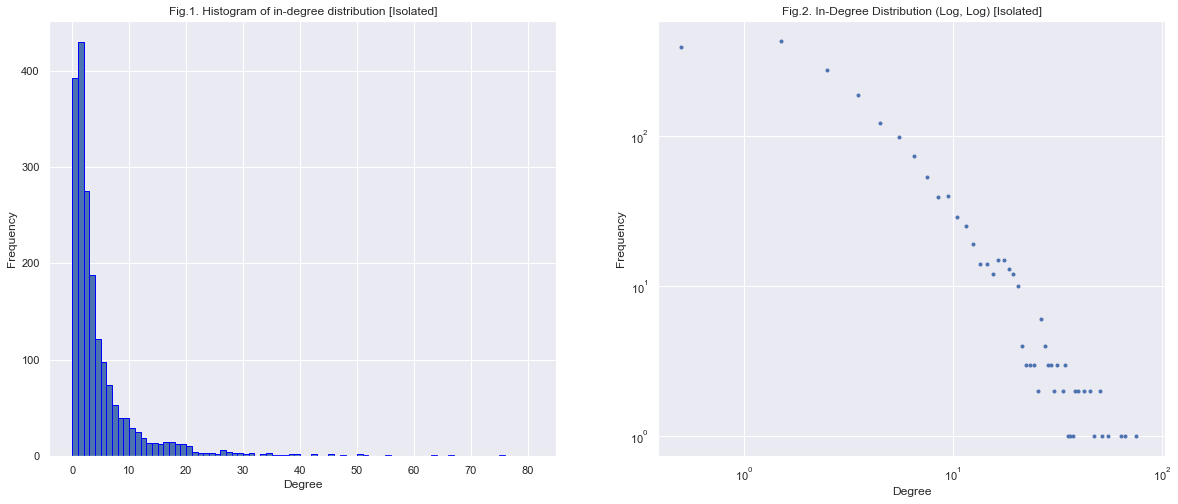

In [6]:
#In and Out Degree Distributions
#Plot degree distribution 

plot_degree_distribution(in_deg, "Fig.1. Histogram of in-degree distribution [Isolated]", 
                        "Fig.2. In-Degree Distribution (Log, Log) [Isolated]")


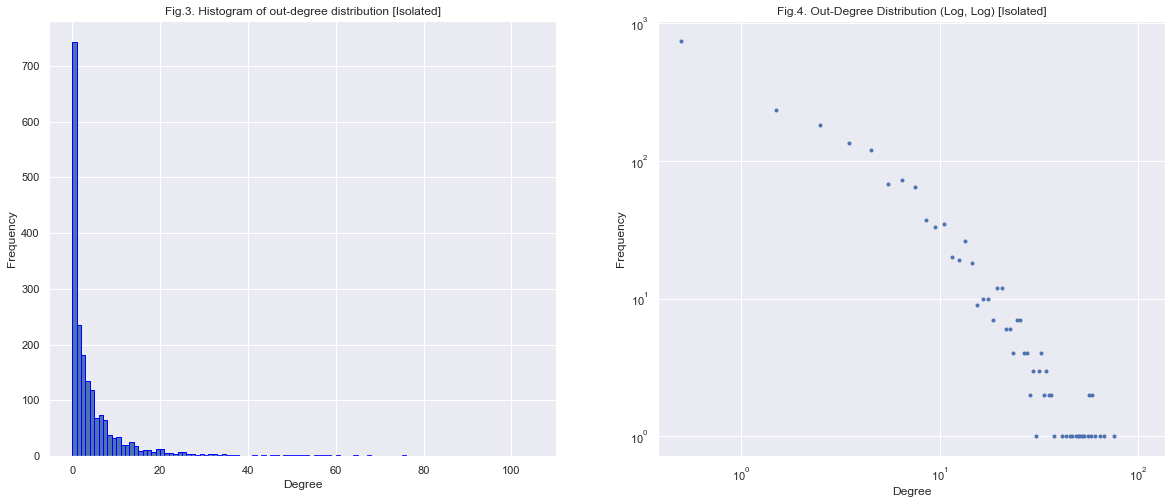

In [7]:
#Plot degree distribution 
plot_degree_distribution(out_deg, "Fig.3. Histogram of out-degree distribution [Isolated]", 
                        "Fig.4. Out-Degree Distribution (Log, Log) [Isolated]")

A visualization of the network can be seen in the figure below.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:48<00:00, 43.85it/s]


BarnesHut Approximation  took  106.35  seconds
Repulsion forces  took  104.60  seconds
Gravitational forces  took  1.42  seconds
Attraction forces  took  0.74  seconds
AdjustSpeedAndApplyForces step  took  5.57  seconds


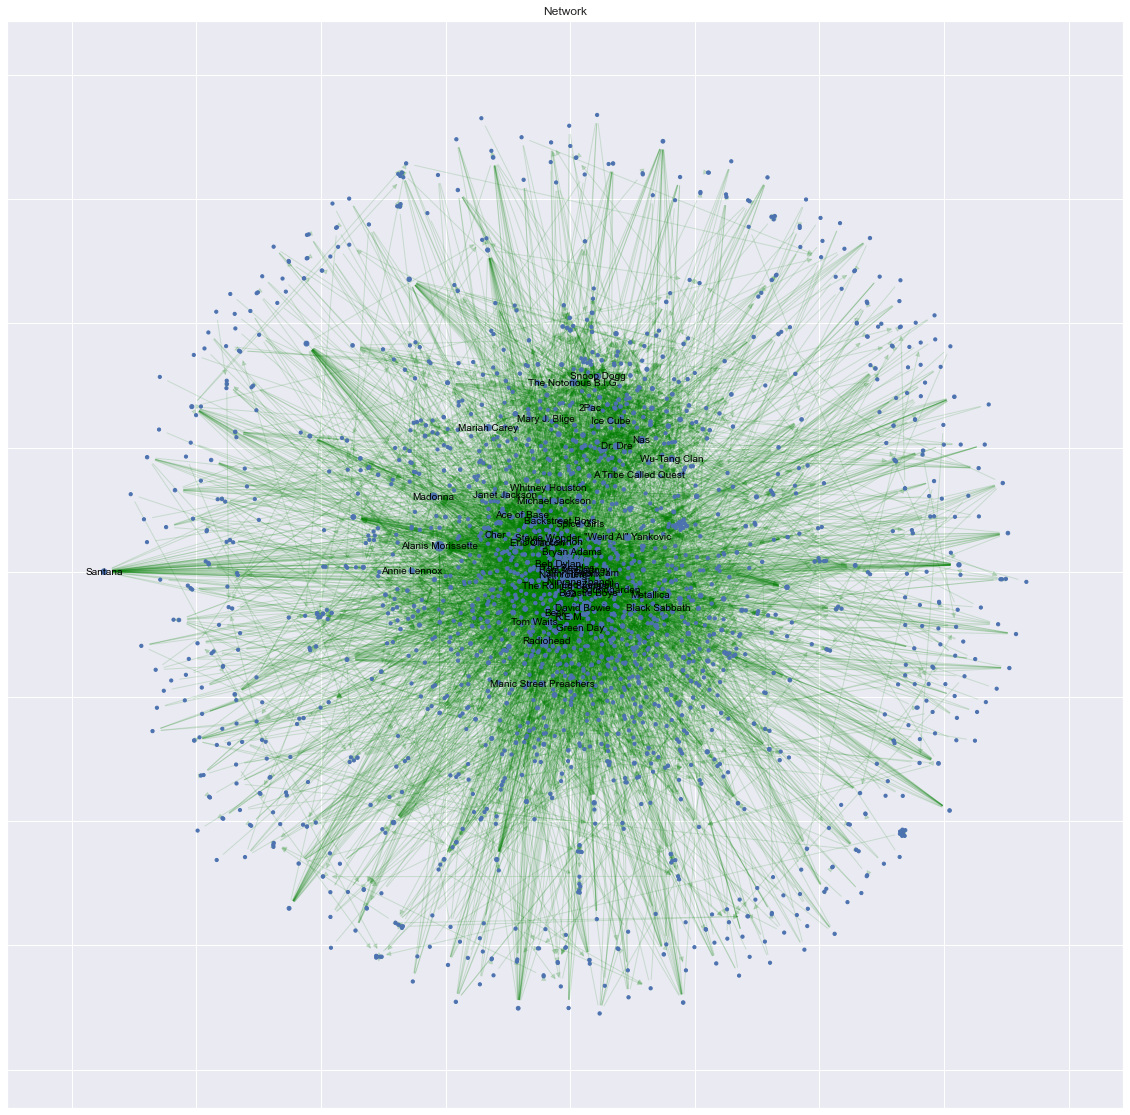

In [8]:
# #visualization Figure 5
from project.visualisations.show_graph import show_graph
show_graph(G, "Network")

## 3. Tools, Theory and Analysis

### 3.1 TFIDF scores and Wordclouds

In [2]:
# Load dataframes and the graph network
script_dir = os.getcwd()
df = pd.read_csv("project/data/spotify_final.csv")
#df_wiki = pd.read_csv("project/data/collaboration_clean.csv")
df_wiki = pd.read_csv("project/data/collaboration_cleaned.csv")
#display(df_wiki)
G = nx.read_gpickle("project/G_wordclouds.pickle")
# Extract the largest component LC
LC = max(nx.weakly_connected_components(G),key=len)
# Save only the largest component as G
G = nx.DiGraph(G.subgraph(LC))
G_u = G.to_undirected()

# sets the scene for plotting
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
colors = sns.color_palette('pastel')

In [3]:
# Add some Date columns to the wiki dataframe
df_wiki['Date'] = df_wiki['Date'].apply(lambda str: pd.Timestamp(str))
df_wiki['Date_month'] = df_wiki['Date'].apply(lambda date: date.month+12*(date.year-1990))
df_wiki['Date_year'] = df_wiki['Date'].apply(lambda date: date.year)

In [4]:
#from project.word_clouds import plot_spotify_distributions, plot_attribute_over_time, spotify_visuals
def plot_spotify_distributions(df, attributes, title=None):
    sns.pairplot(df[attributes], kind='reg', diag_kind='kde', corner=True)
    plt.show()

def plot_attribute_over_time(df, attributes, by_month=True, month_interval=6, title=None):
    num_years = 10
    months_in_year = 12
    period = num_years*months_in_year
    for attribute in attributes:

        if by_month:
            attribute_by_month = {month:np.mean(list(df_month[attribute]))                        
                                  for month,df_month in df.groupby('Date_month') if (month>=1 and month<=120)}
        else:
            attribute_by_year = {year:np.mean(list(df_year[attribute]))
                                 for year,df_year in df.groupby('Date_year') if (year>=1990 and year<=1999)}
        ydata = list(attribute_by_month.values())
        xdata = list(attribute_by_month.keys())
        
        fig,ax = plt.subplots(1,1,figsize=(15,5),tight_layout=True)
        sns.barplot(x=xdata, y=ydata, color=attribute_to_color[attribute])
        plt.plot(xdata,ydata,color='black')
        ax.set(title = attribute.capitalize()+' vs Time', xlabel = 'Months', ylabel = attribute.capitalize())
        plt.xticks([i*month_interval for i in range(int(period/month_interval))],
                   [['Jan '+str(int(1990+i/(months_in_year/month_interval))),'Jun '+str(int(1990+i/(months_in_year/month_interval)))][i%2]
                    for i in range(int(num_years*months_in_year/month_interval))],
                   rotation=45)
        plt.title(title)
        plt.show()
        
def spotify_visuals(Graph,sp_attributes, title=None):
    graph_nodes = dict(Graph.nodes)
    N = len(sp_attributes)
    ncols = 3
    nrows = int(N/ncols)+N%ncols
    fig = plt.figure(figsize=(20,20),constrained_layout=True)
    grid = plt.GridSpec(nrows, ncols, wspace = .05, hspace = .05, figure=fig)

    for ind,sp_attribute in enumerate(sp_attributes):
        ydata_dict = {i:attributes[sp_attribute] for i,attributes in enumerate(graph_nodes.values()) if not np.isnan(attributes[sp_attribute])}
        ydata = [val for val in ydata_dict.values()]
        xdata = [attributes['in_degree']+attributes['out_degree'] for i,attributes in enumerate(graph_nodes.values()) if i in ydata_dict.keys()]
        correlation = pearsonr(xdata, ydata) 
        xplace = int(ind/ncols)
        if nrows*ncols-ind <= ncols:
            yplace = slice(ind%ncols,ind%ncols+ncols)
        else:
            yplace = ind%ncols
            
        plt.subplot(grid[xplace, yplace])
        plt.scatter(xdata, ydata, alpha = 0.3, color='green')
        plt.title(f'{sp_attribute} vs nr of collabs. corr:{round(correlation[0],3)}, p-val:{round(correlation[1],3)}')
        plt.xlabel('Nr of collabs')
        
        plt.ylabel(sp_attribute)
        
    plt.show()

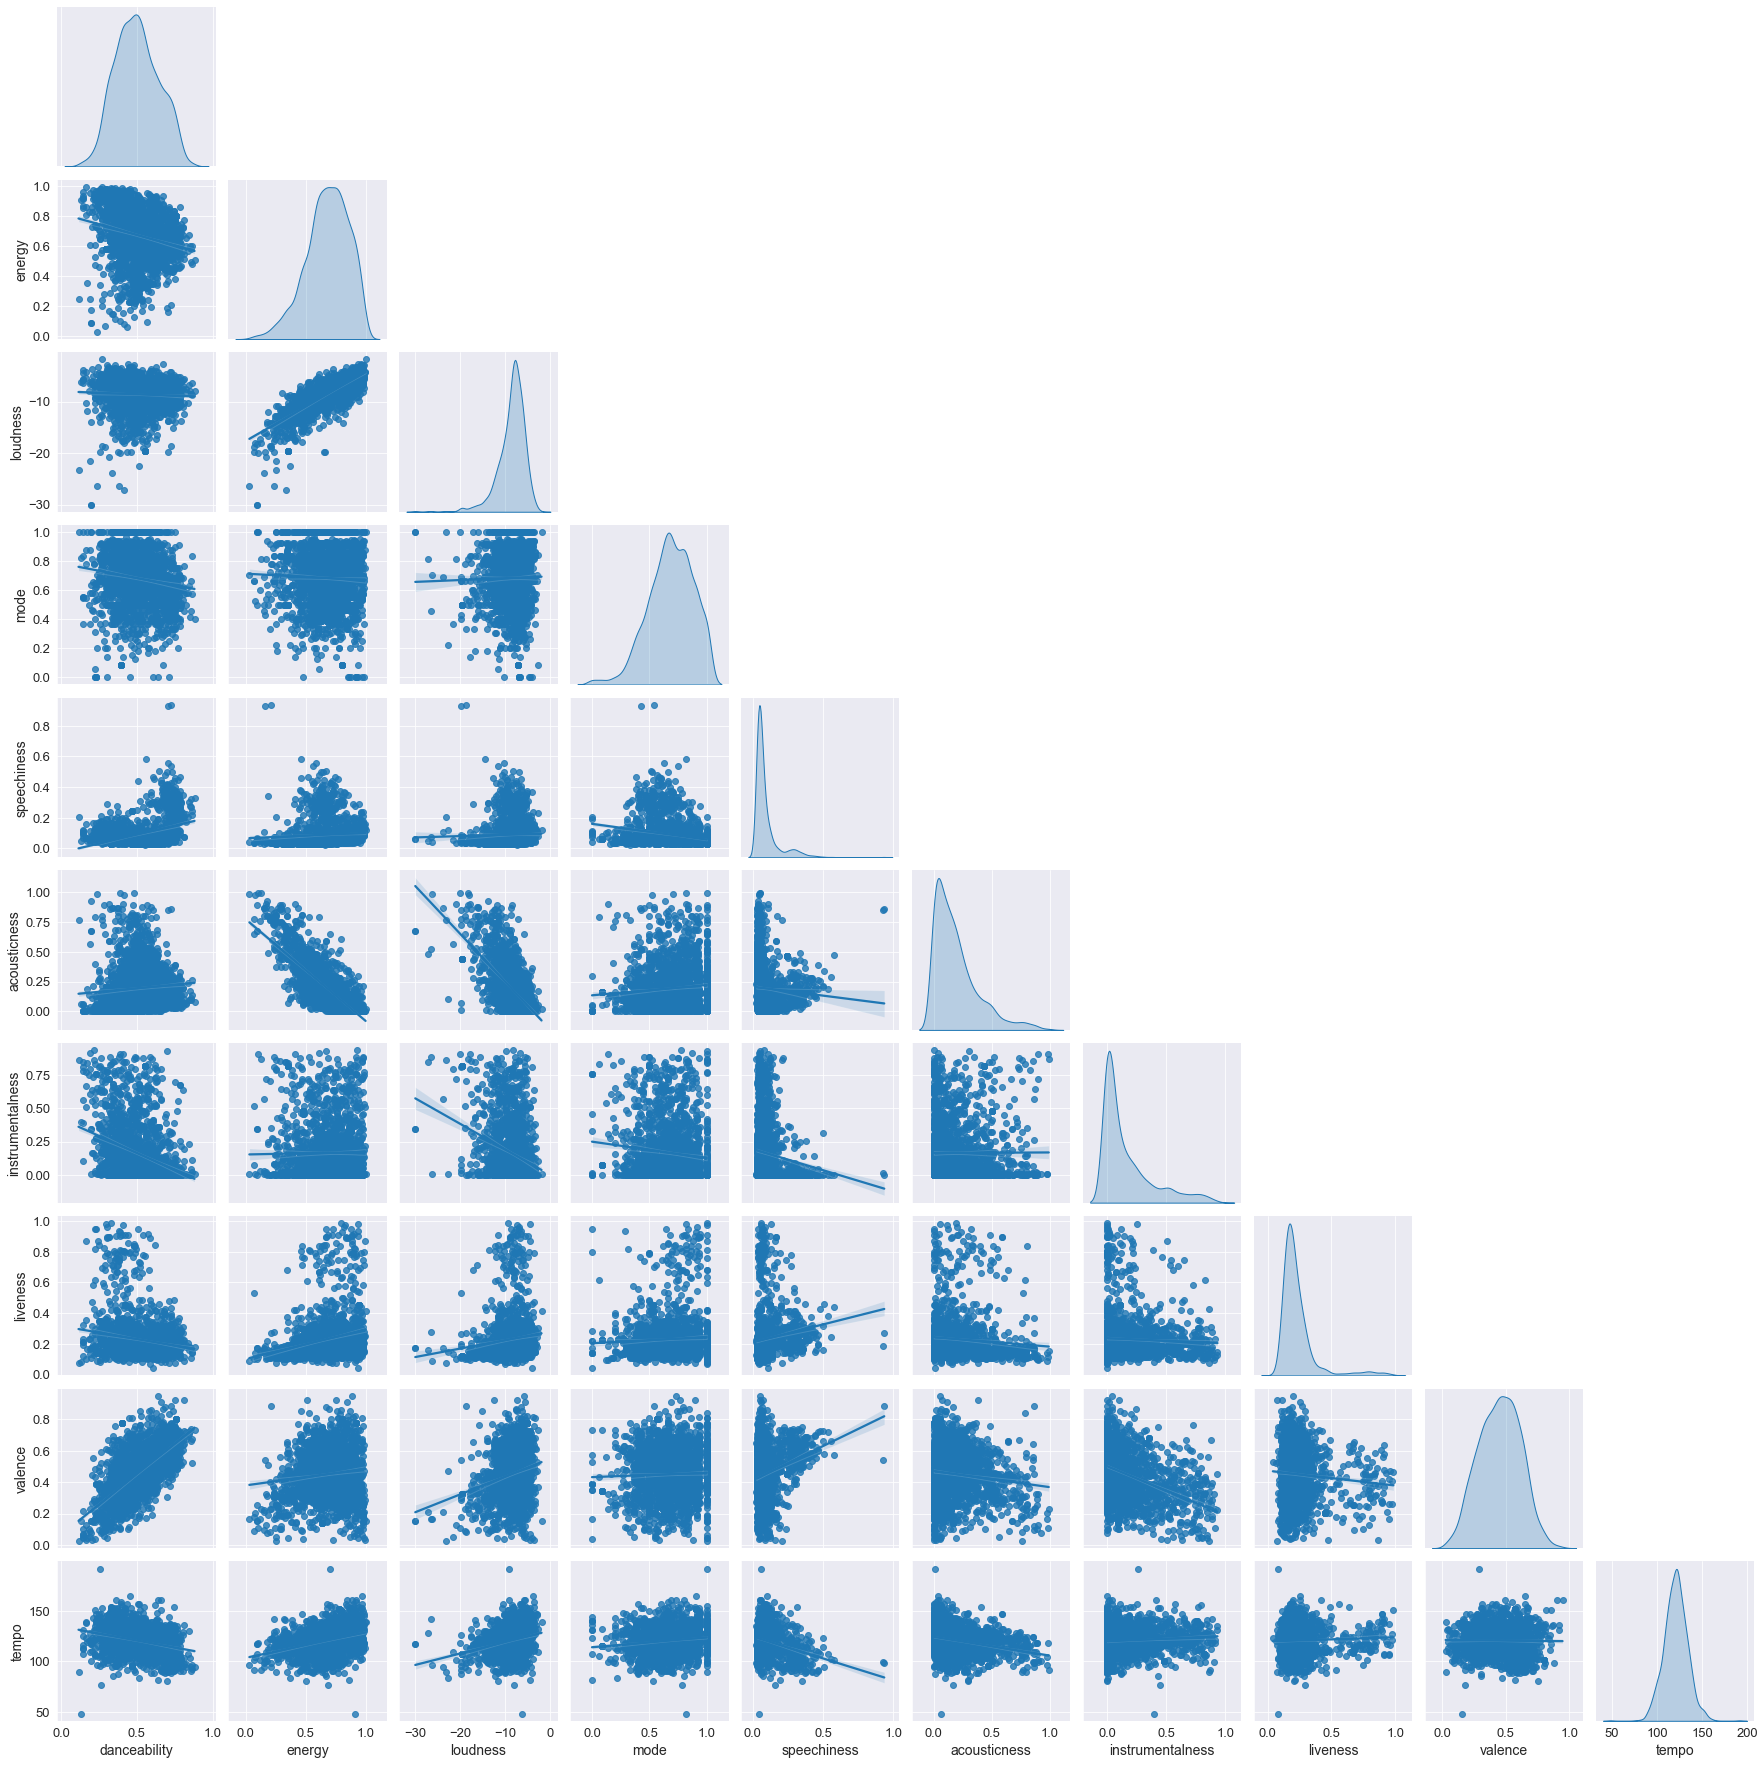

In [7]:
sp_attributes = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo']
plot_spotify_distributions(df_wiki, sp_attributes, "Fig. 4.")

Looking at the above plot, there is a lot to unpack. Firstly we have done a scatter plot between every spotify attribute, and then a linear regresson on top of that, to see if there is a correlation between the attribute. In light of this, we notice that there is a correlation between the following:  
* danceability and valence. This is a positive correlation
* energy and loudness. This is a positive correlation
* energy and acousticness. This is a negative correlation  

It makes sense that there would be a positive correlation between danceability and valence, as valence is a measure of positivity, and positive songs tend to be easy to dance to (think "Walking on Sunshine"). The positive correlation between energy and loudness makes sense as well, as we often associate energy to loudness. Finally the negative correlation between energy and acousticness makes a lot of sense, as acoustic songs tend to be more down to earth and slow than digital and electric versions. Therefore the higher the lower the energy, the higher the acousticness. Then there are other correlations that aren't as strong and we won't go into more detail on them. They include: danceability and tempo, energy and tempo and loudness and acousticness.

The diagonal gives us the distribution of each spotify attribute for all the albums in the dataframe (i.e. for every spotify attribute, the distribution of their values among all the albums is found). From this we can highlight the following.
* The attributes danceability, valence and tempo all have a very clean normal distribution. This means that for these attributes, the mean value is right around the median value.
* The attributes energy, loudness and mode all have a left-skewed normal distribution. This indicates that for these attributes the mean value is higher than the median value, meaning that albums tend to have a higher energy, loudness and mode than what is considered "in the middle".
* In opposition, the attributes speechiness, acousticness, instrumentalness and liveness have a right-skewed  normal distribution. This indicates that the mean value is lower than the median value and albums tend to have a quite low speechiness, acousticness, instrumentalness and liveness. This makes sense with a growing trend of making digital music that doesn't require actual instruments.


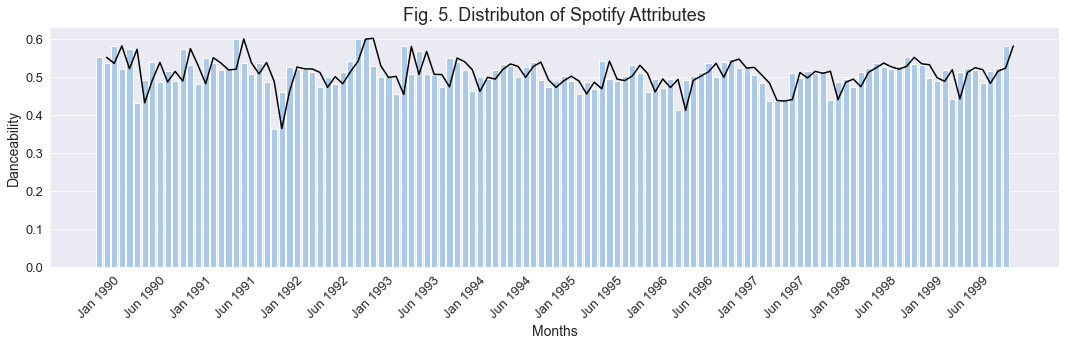

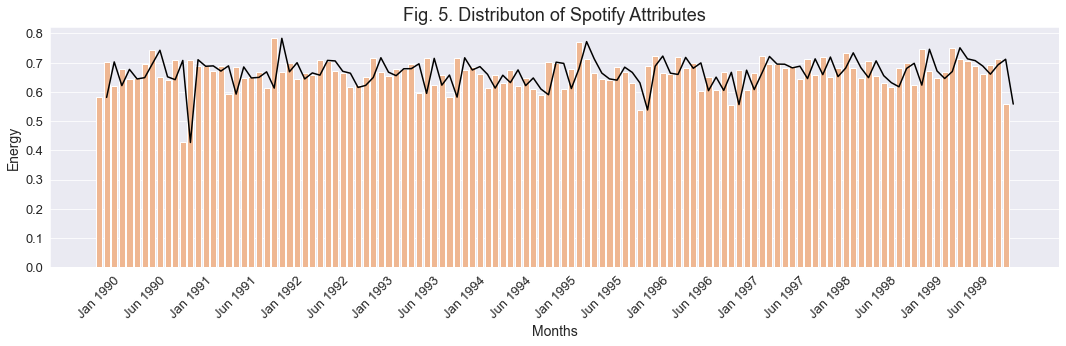

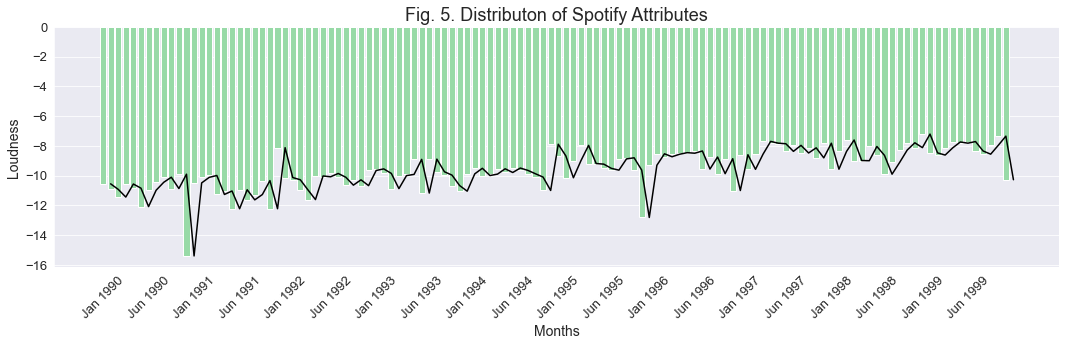

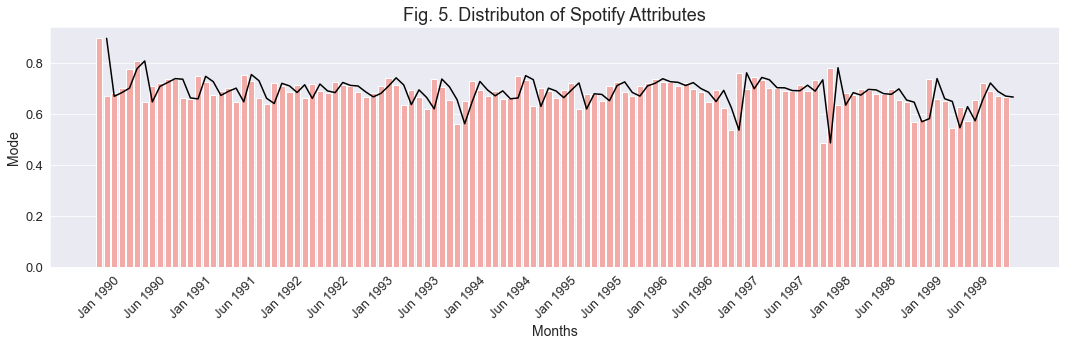

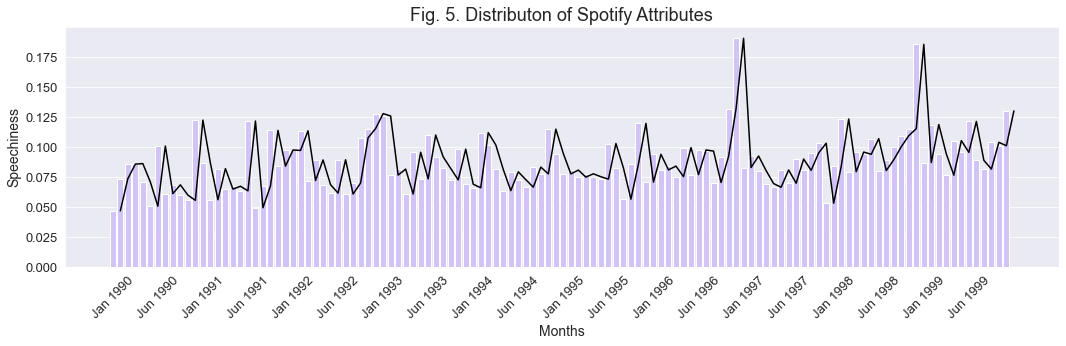

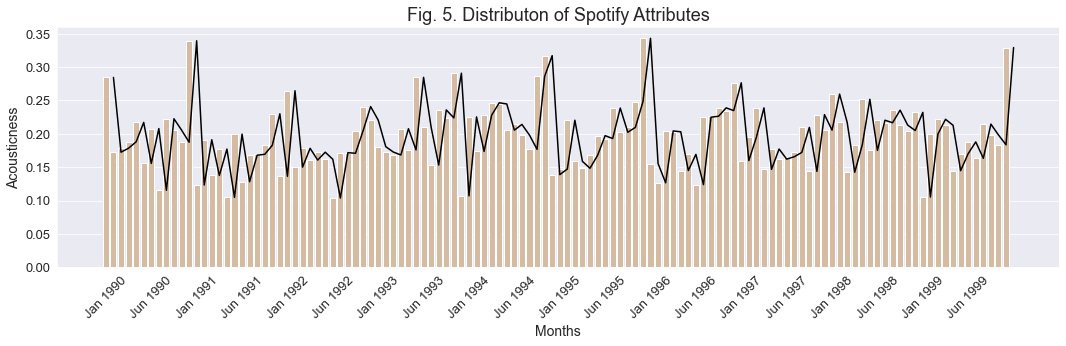

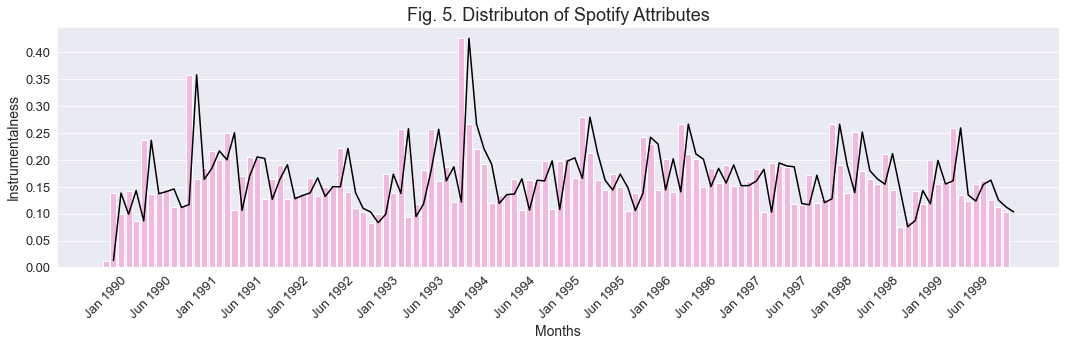

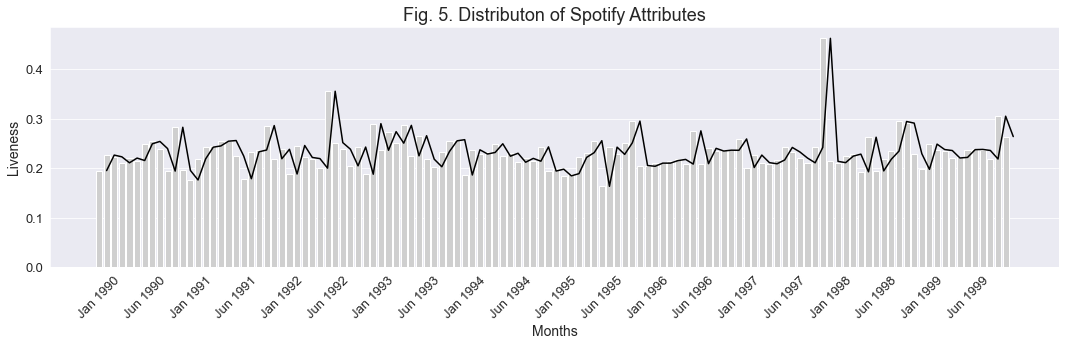

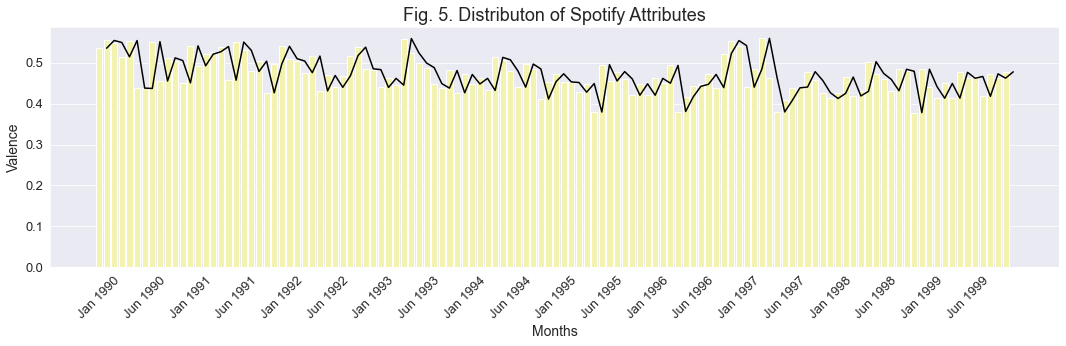

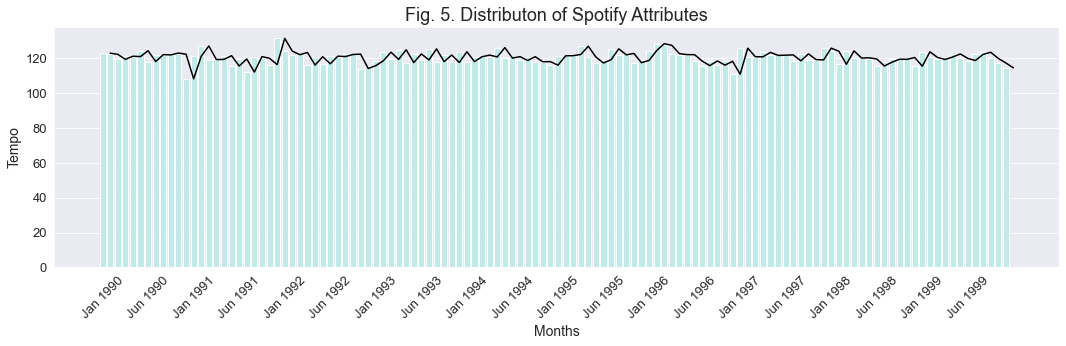

In [5]:
attribute_to_color = {attribute:colors[i] for i,attribute in enumerate(sp_attributes)}
# plot all the spotify attributes over the decade of time
plot_attribute_over_time(df_wiki,attributes = sp_attributes, title="Fig. 5. Distributon of Spotify Attributes")

Here we see a plot of the average monthly values of every spotify attribute over the decade of the 90's. It allows us to get an idea of how music has changed over this time period. As we can see, the attribute values doesn't change much, but there are a few things we can hightlight.

speechiness, acousticness and instrumentalness all tend to peak around the end of each year. This makes sense as it is right around Christmas, where lots of artists release acoustic christmas music that is often times less energetic and more "hygge", thus the peaks in these attributes :).

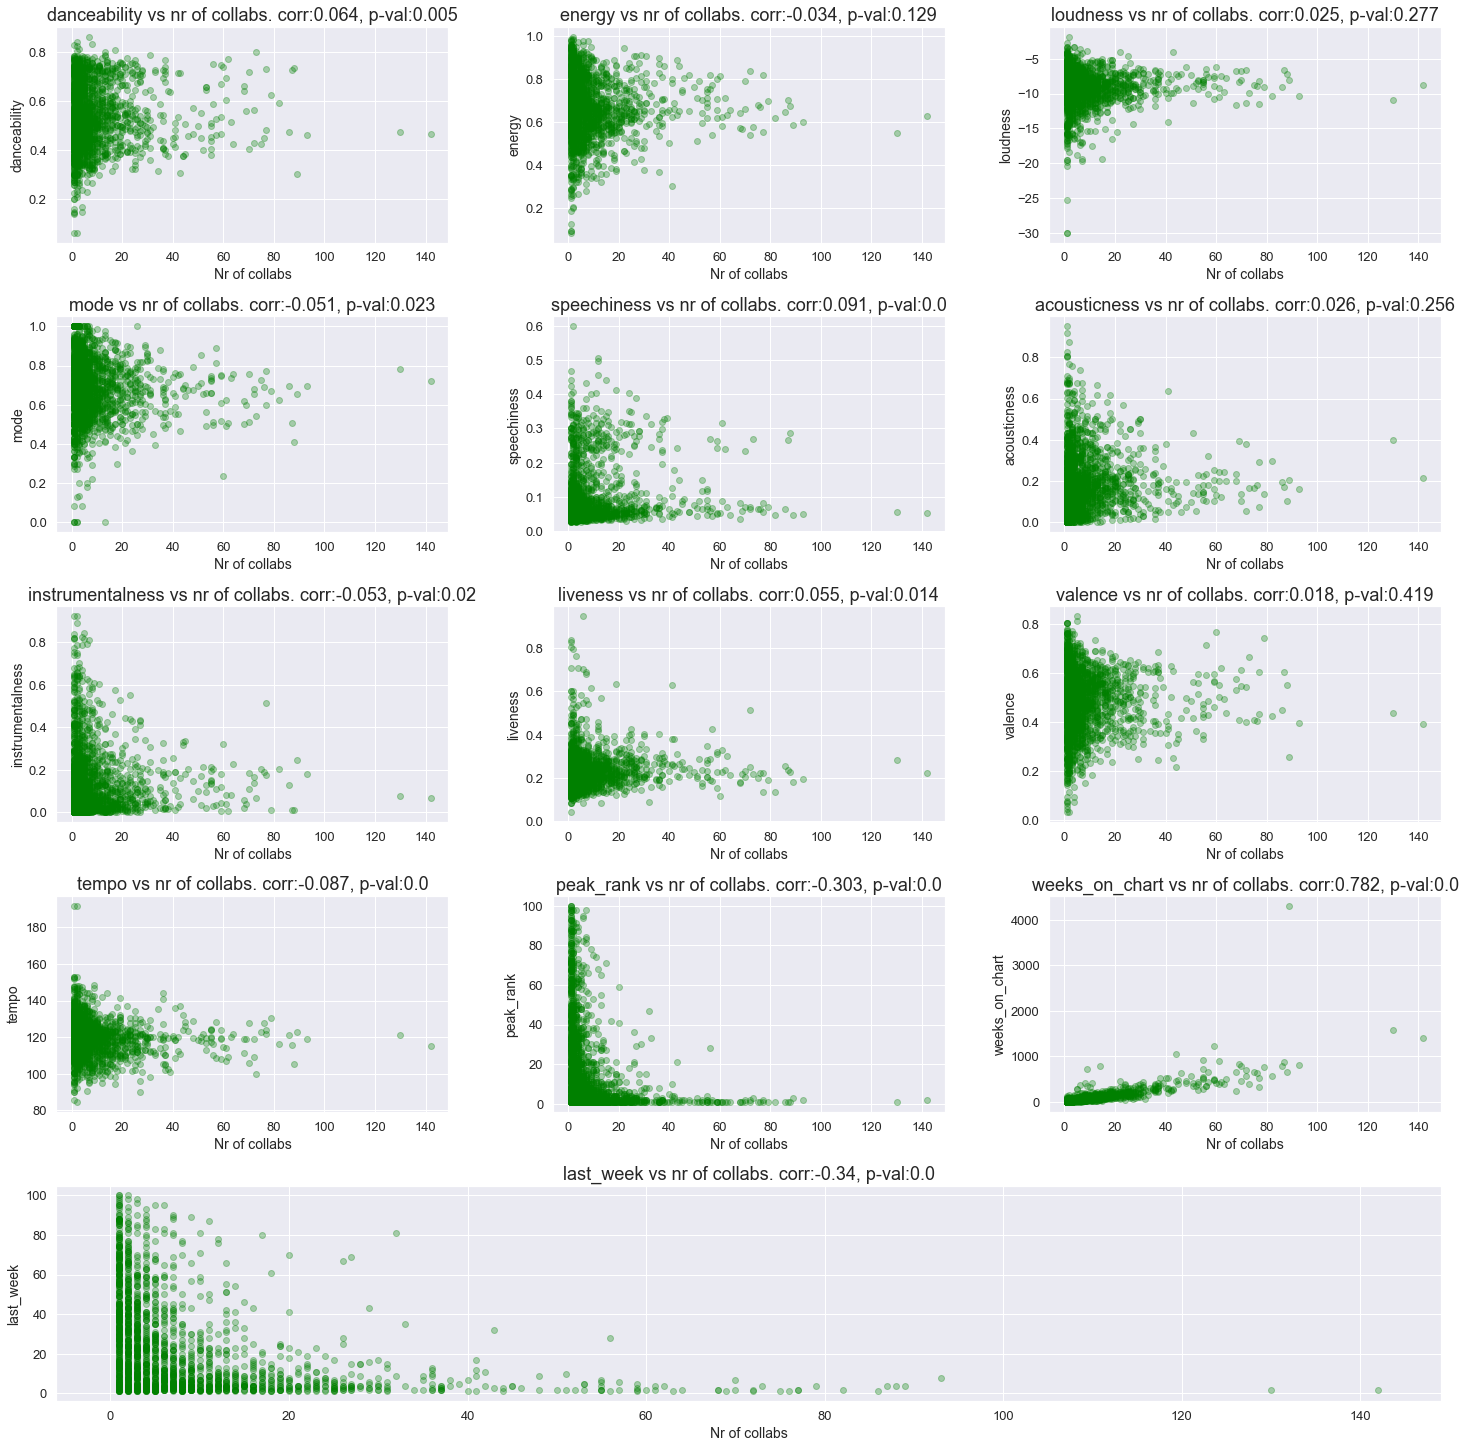

In [14]:
all_attributes = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'peak_rank', 'weeks_on_chart', 'last_week']
spotify_visuals(G,all_attributes)

Above we can see a scatter plot of every spotify attribute along with some other node attributes compared to the number of collaborations that artist has. There is little correlation between any single spotify attribute and the number of collaborations. We do however see a relatively strong correlation between the number of weeks that artist had on the billboard charts and their number of collaborations. This is interesting, as it points to the conclusion that the more popular you are (i.e. the more weeks you have on the charts), the more collaborations you have!

In [15]:
"""
# Calculate the TFIDF, TCIDF scores and partition
partition = community_louvain.best_partition(G_u)
TCIDF = calculate_tfidf(G_u, as_TCIDF=True, partition=partition)
TFIDF = calculate_tfidf(G_u, as_TCIDF=False, partition=partition)
#community_genres = lyrics_to_community_genres()
"""
# Alternatively: load the already calculated TFIDF, TCIDF scores and partition
with open(os.path.join(script_dir,'project/data/louvain_partition.txt'),'r') as x:
        partition = json.load(x)
with open(os.path.join(script_dir,'project/data/TCIDF_lyrics.txt'),'r') as x:
        TCIDF = json.load(x)
with open(os.path.join(script_dir,'project/data/TFIDF_lyrics.txt'),'r') as x:
        TFIDF = json.load(x)
unique_communities = list(TFIDF.keys())

In [16]:
# Find top 5 TFIDF values words for each community
top5_tfidf_coms = {com:sorted(TFIDF[com].items(), key=lambda x: x[1],reverse=True)[:5] for com in unique_communities}
print(f'Top 5 TFIDF values words for each community:\n')
for com in unique_communities:
    #print(f'{com}: {[(word,round(val,4)) for word,val in top5_tfidf_coms[com]]}')
    print(f'{com}: {[word for word,_ in top5_tfidf_coms[com]]}')

Top 5 TFIDF values words for each community:

0: ['supernova', 'asha', 'psychedelic', 'brimful', 'beta']
1: ['undefeated', 'depending', 'iggy', 'brute', 'butt']
2: ['hellbound', 'ch', 'bab', 'metallic', 'eiffel']
3: ['ba', 'dah', 'ã', 'chka', 'doo']
4: ['grandma', 'benedict', 'ben', 'needledick', 'swallowing']
5: ['que', 'te', 'el', 'mi', 'tu']
6: ['nigga', 'yo', 'mc', 'muthafuckas', 'rap']
7: ['shaft', 'boom', 'mah', 'sexy', 'poodle']
8: ['illegitima', 'venus', 'sole', 'variety', 'somethinâ']
9: ['felicia', 'original', 'racer', 'memphis', 'hexum']
10: ['fiona', 'remove', 'na', 'everytime', 'lobo']
11: ['elegantly', 'downhearted', 'hann', 'og', 'extricate']
12: ['willy', 'buzz', 'jackyard', 'backoff', 'deliverance']
13: ['juggla', 'heh', 'ha', 'shag', 'tweedle']
14: ['na', 'palindrome', 'giant', 'repeater', 'horrible']
15: ['diane', 'grade', 'enid', 'ba', 'shakey']


Above we see the top 5 words in every community according to TFIDF scores. Interestingly enough, there seems to be a lot of negative and slander words that are getting the highest scores. This is not so surprising, as there is a wide variety of these slander words, so one artist can say a similar thing while using completely different slander, thus leading to a situation where there are many unique slander words in each community.

In [17]:
community_to_genre = lyrics_to_community_genres(path_txts="project/data/lyrics_preprocessed/",partition=partition)
community_to_genrecounts = {community:sorted(FreqDist(community_to_genre[int(community)]).items(),
                                             key=lambda x: x[1], reverse=True)
                            for community in unique_communities}
for com,genrecount in community_to_genrecounts.items():
    print(f'{com}: {[(genre,count) for genre,count in genrecount if genre != ""][:5]}')

0: [('Rock', 58), ('Alternative', 50), ('Punk', 29), ('Metal', 29), ('Industrial', 28)]
1: [('New', 6), ('Pop', 6), ('Electronic', 5), ('Downtempo', 5), ('Alternative', 4)]
2: [('Rock', 19), ('Alternative', 16), ('Indie', 9), ('Punk', 8), ('Rockindie', 7)]
3: [('Pop', 106), ('Rock', 79), ('Dance-pop', 54), ('Alternative', 32), ('Popdance-popr&bteen', 26)]
4: [('Rock', 84), ('Alternative', 74), ('Pop', 36), ('Art', 29), ('Metal', 25)]
5: [('Rock', 16), ('Pop', 12), ('Poppopboleromariachi', 8), ('Latin', 8), ('Alternative', 5)]
6: [('Hip', 153), ('Hop', 123), ('R&b', 40), ('Soul', 21), ('Coast', 20)]
7: [('Metal', 93), ('Rock', 66), ('Heavy', 56), ('Alternative', 52), ('Hard', 27)]
8: [('Progressive', 5), ('Rock', 5), ('Pop', 3), ('Dream', 3), ('Alternative rock', 2)]
9: [('Rock', 24), ('Alternative', 19), ('Pop', 8), ('Blues', 8), ('Metal', 7)]
10: [('Country', 64), ('Folk', 41), ('Rock', 41), ('Pop', 27), ('Alternative', 19)]
11: [('Rock', 24), ('Alternative', 22), ('Rockhard', 9), ('R

We see that the majority of the louvain algorithm generated communities are dominated by the Rock genre. This makes sense though, because a lot of artists have Rock as one of their genres, even if that isn't there main focus. This is because Rock is a very broad and developed genre, so it captures a lot of different music, even music that some wouldn't necessarily consider Rock.

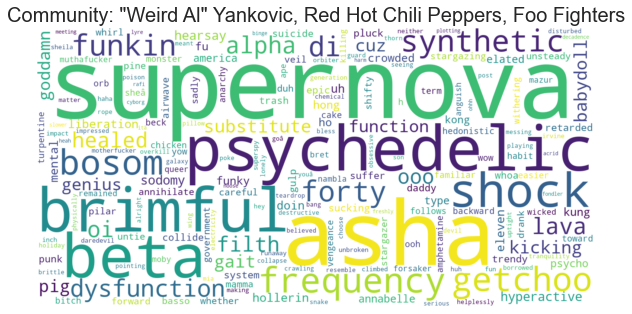

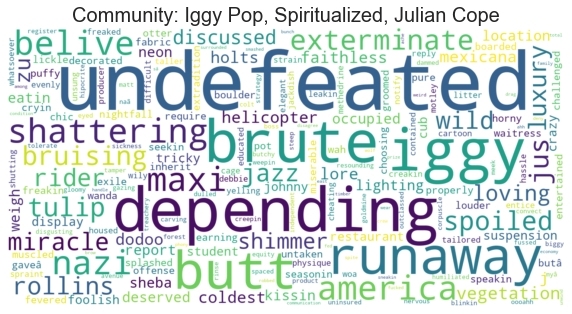

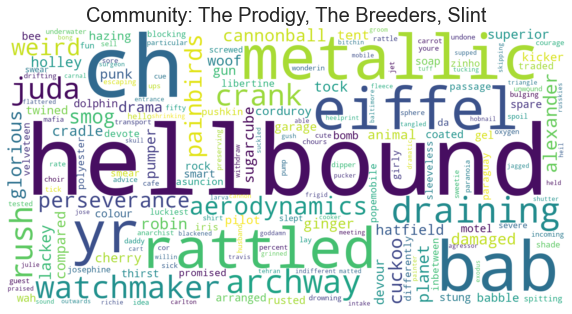

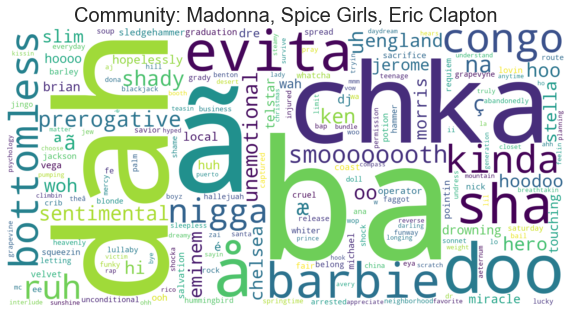

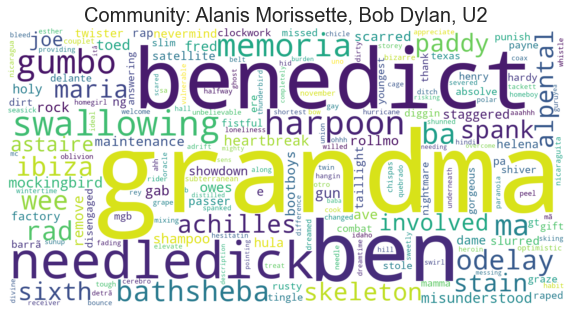

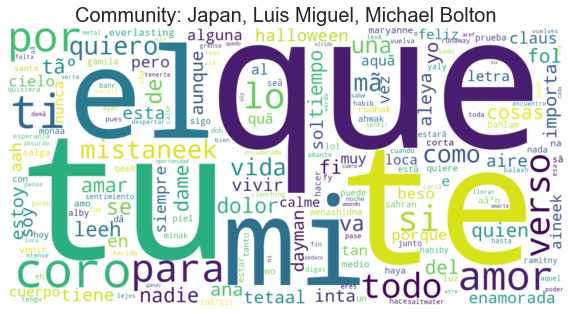

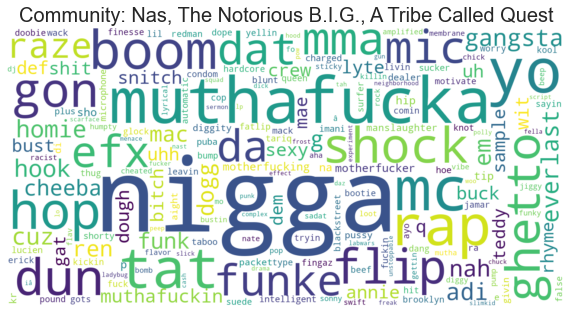

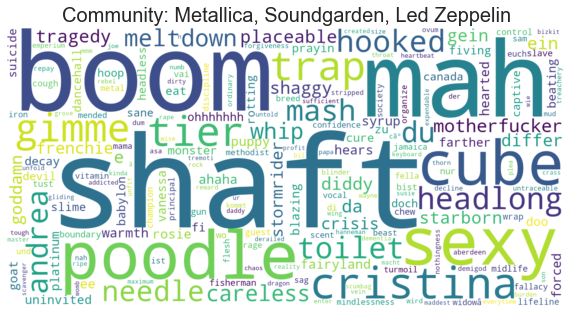

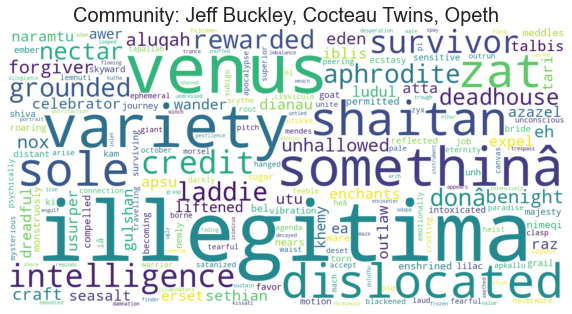

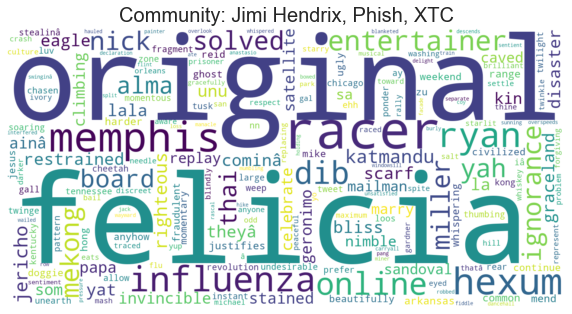

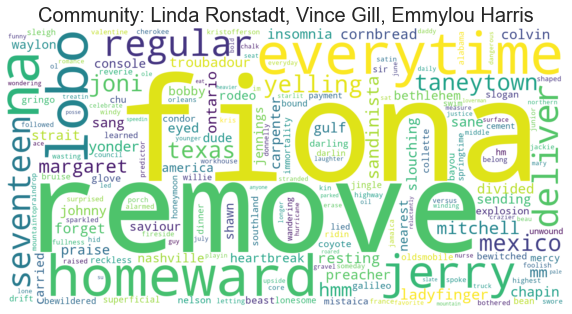

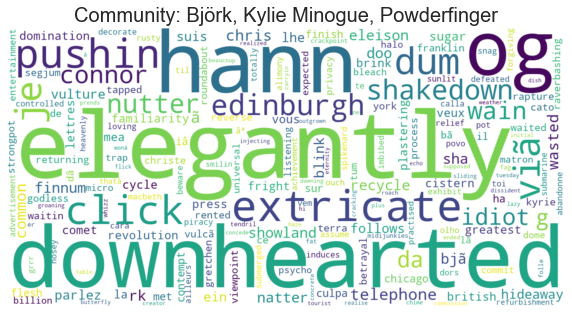

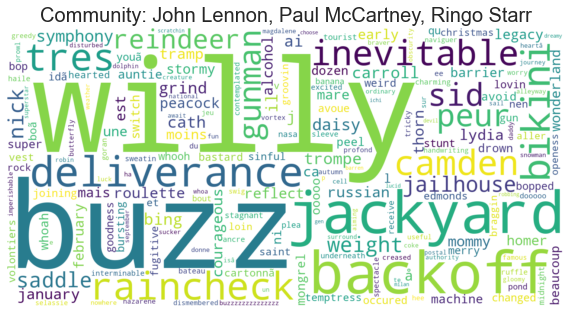

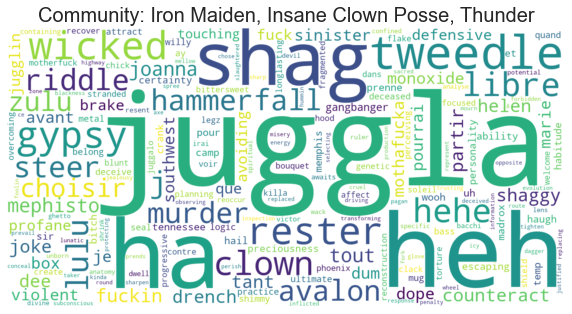

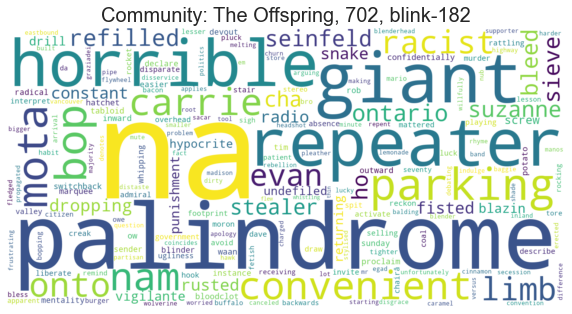

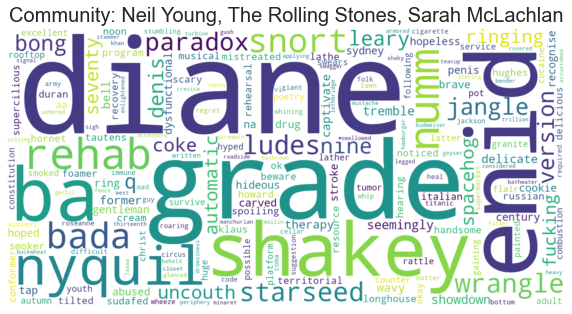

In [18]:
plot_wordclouds('Community',TCIDF,unique_communities)

In [19]:
community_to_artists = {community:[artist for artist in partition if partition[artist] == community]
                       for community in set(partition.values())}
# remove empty communities
community_to_artists = {community:artists
                       for community,artists in community_to_artists.items()
                       if len(artists) > 0}
community_to_artistcollabs = {community:sorted([(artist,dict(G.nodes)[artist]['in_degree']+dict(G.nodes)[artist]['out_degree'])
                   for artist in artists], key=lambda x: x[1], reverse=True)
 for community,artists in community_to_artists.items()}

In [20]:
for community in unique_communities:
    print(community_to_artistcollabs[int(community)][:3])

[('"Weird Al" Yankovic', 79), ('Red Hot Chili Peppers', 50), ('Foo Fighters', 48)]
[('Iggy Pop', 23), ('Spiritualized', 13), ('Julian Cope', 8)]
[('The Prodigy', 27), ('The Breeders', 27), ('Slint', 19)]
[('Madonna', 82), ('Spice Girls', 77), ('Eric Clapton', 72)]
[('Alanis Morissette', 142), ('Bob Dylan', 130), ('U2', 93)]
[('Japan', 28), ('Luis Miguel', 22), ('Michael Bolton', 16)]
[('Nas', 88), ('The Notorious B.I.G.', 87), ('A Tribe Called Quest', 73)]
[('Metallica', 72), ('Soundgarden', 59), ('Led Zeppelin', 55)]
[('Jeff Buckley', 17), ('Cocteau Twins', 11), ('Opeth', 11)]
[('Jimi Hendrix', 55), ('Phish', 30), ('XTC', 18)]
[('Linda Ronstadt', 30), ('Vince Gill', 29), ('Emmylou Harris', 29)]
[('Björk', 36), ('Kylie Minogue', 29), ('Powderfinger', 23)]
[('John Lennon', 63), ('Paul McCartney', 59), ('Ringo Starr', 35)]
[('Iron Maiden', 24), ('Insane Clown Posse', 23), ('Thunder', 13)]
[('The Offspring', 36), ('702', 27), ('blink-182', 26)]
[('Neil Young', 77), ('The Rolling Stones', 

### 3.2 Sentiment Analysis 

The purpose of the sentiment analysis part is to analyze the lyrics of different artists and albums in order to determine if the sentiment score for each album in the network is influenced by specific features such as genre, year, trend in the number of collaborations etc. Ultimately, the analysis of this part investigates the interplay between the LabMT sentiment score and features such as lexical richness, number of collaborations or weeks in chart. 
In order to do so, we broke down our analysis into 3 levels: exploratory sentiment analysis of all the artists in the network (3.2.1), analysis of communities of artists and associated genres (3.2.2) and analysis of the most successful artists (3.2.3).

Our findings from this part will susbsequently be used in Part 3.3 to determine if the sentiment score is a determining factor in predicting the populariy of an artist. 

In [21]:
#upload lyrics files
LYRICS_FOLDER = "project/data/lyrics.zip"
LYRICS_PATH = "project/data/lyrics/"
with zipfile.ZipFile(LYRICS_FOLDER, 'r') as zip_ref:
    zip_ref.extractall(LYRICS_PATH)
files = [f for f in os.listdir(LYRICS_PATH) if isfile(join(LYRICS_PATH, f))]

punctuations = "?:!.,;"

df_sentiment = pd.read_csv("project/data/Data_Set_S1.txt", sep="	")
wordnet_lemmatizer = WordNetLemmatizer()

In [22]:
#import csv file
df = pd.read_csv("project/data/final_df.csv")
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.len_collabs = df['Artist'].apply(lambda x: dict(G.nodes)[x]['in_degree']+ dict(G.nodes)[x]['out_degree']
                                    if x in dict(G.nodes).keys() else np.nan)

####  3.2.1. Exploratory analysis of the overall sentiment score of the nodes in the network

In this part of the exercise, we use two sources of sentiment analysis scoring, based on the LabMT and VADER methods.  The LabMT method is implemented here only based on the sentiment score of each of the words in the text, as an arithmetic average of each word's score. It ranges between 1.3 and 8.5, with 5 being neutral. On the other hand, VADER (Valence Aware Dictionary and Sentiment Reasoner) is a rule-based method, but it also leverages on the previously mentioned word-level sentiment scores. However, it uses concepts such as boosters and negators to scale and flip the sentiments of the words accordingly. It was originally developed specifically for Twitter and social media analysis and it ranges between -3.9 and 3.4. The difference between these methods is that LabMT only takes into consideration the sentiment of each word, while VADER attempts to interpret the sentence as a whole, showcasing how words and punctuation interact with each otheR.

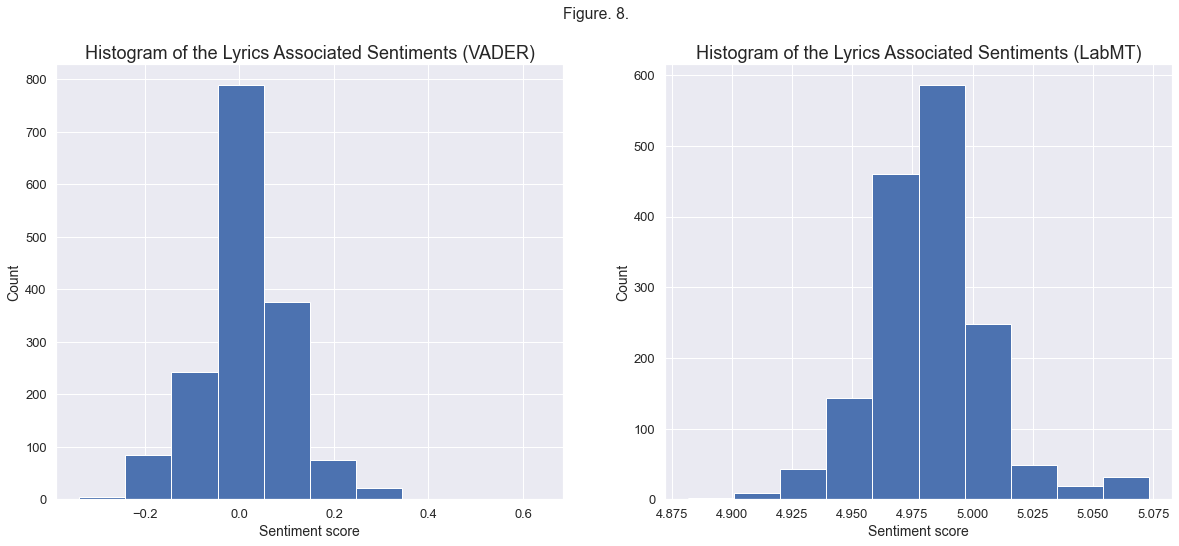

In [23]:
plt.rcParams["figure.figsize"] = (10,8)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.hist(df["sentiment_VADER"])
ax1.set_title("Histogram of the Lyrics Associated Sentiments (VADER)")
ax1.set_xlabel("Sentiment score")
ax1.set_ylabel("Count")

ax2.hist(df["sentiment_LabMT"])
ax2.set_title("Histogram of the Lyrics Associated Sentiments (LabMT)")
ax2.set_xlabel("Sentiment score")
ax2.set_ylabel("Count")
plt.suptitle("Figure. 8.")
plt.show()

In [24]:
pd.options.display.max_colwidth = 150
#top 10 characters with happiest and saddest pages in Vader
vader_happy= df.nlargest(10, "sentiment_VADER")[["Artist","Album", "sentiment_VADER", "weeks_on_chart"]]
vader_sad= df.nsmallest(10, "sentiment_VADER")[["Artist","Album", "sentiment_VADER", "weeks_on_chart"]]
labmt_happy= df.nlargest(10, "sentiment_LabMT")[["Artist","Album", "sentiment_LabMT", "weeks_on_chart"]]
labmt_sad= df.nsmallest(10, "sentiment_LabMT")[["Artist","Album", "sentiment_LabMT", "weeks_on_chart"]]


We start our analysis by examining the distribution of the sentiments of our lyrics. We notice that in Fig. 8a), the values of the sentiment score lie between -1 and 1 and they follow a Gaussian distribution centered around 0. In Fig. 8b), we notice that the values of sentiment score for LabMT method lie between 4.9 and 5.095. The histogram follows a Gaussian distribution, with most values centered around 5, but with the entire distribution being slightly skewed to the left. From the distribution of these two histograms, we expect most of the lyrics-associated sentiment to follow a regular Gaussian distribution, with most lyrics being associated with a neutral sentiment.

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


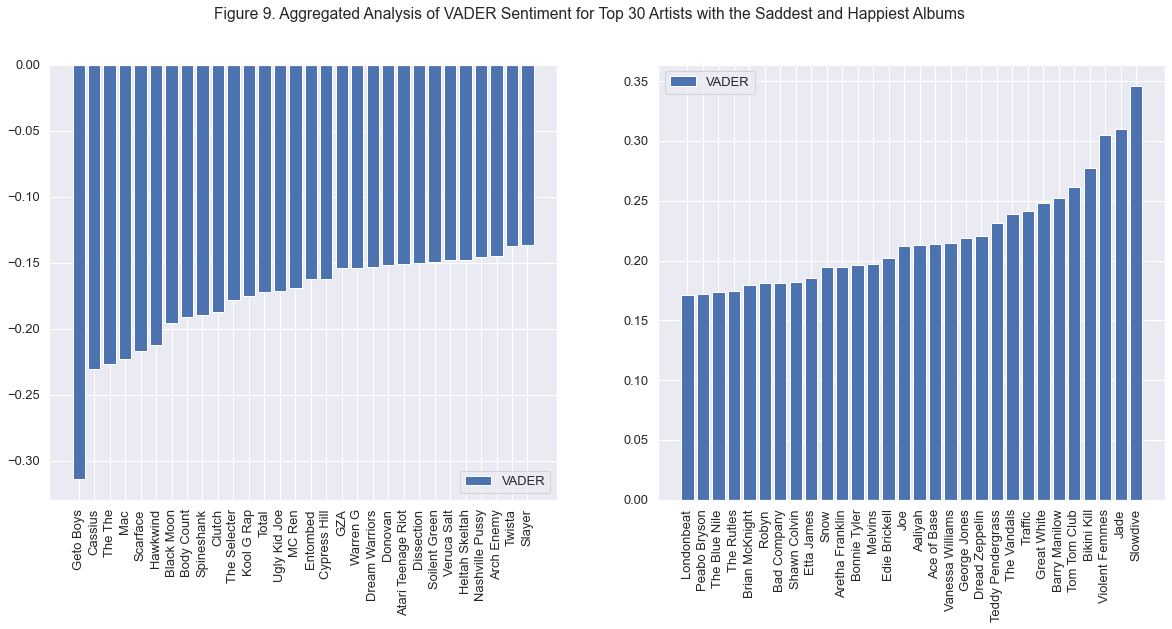

In [25]:
#sort artists by VADER score
#happiest 30
top_30_happiest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_VADER", np.median), std=("sentiment_VADER", np.std))\
            .sort_values("sentiment")[:30]
#sadest 30
top_30_saddest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_VADER", np.median), std=("sentiment_VADER", np.std))\
            .sort_values("sentiment")[-30:]
#bar plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
p1 = ax1.bar(top_30_happiest.index, top_30_happiest["sentiment"], label="VADER")
p2 = ax2.bar(top_30_saddest.index, top_30_saddest["sentiment"], label="VADER")
ax1.set_xticklabels(labels=top_30_happiest.index, rotation=90)
ax2.set_xticklabels(labels=top_30_saddest.index, rotation=90)
ax1.legend()
ax2.legend()
plt.suptitle("Figure 9. Aggregated Analysis of VADER Sentiment for Top 30 Artists with the Saddest and Happiest Albums")
plt.show()

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


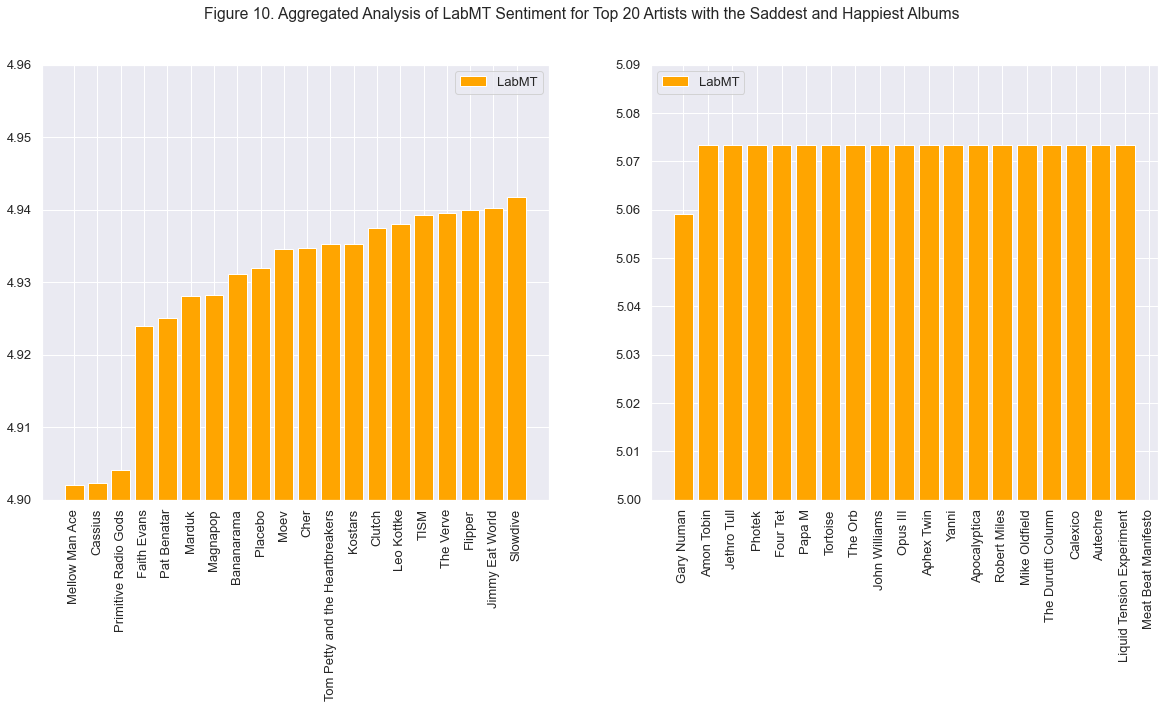

In [26]:
#sort artists by VADER score
#happiest 30
top_30_happiest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_LabMT", np.median), std=("sentiment_LabMT", np.std))\
            .sort_values("sentiment")[:20]       
#sadest 30
top_30_saddest = df.groupby("Artist")\
            .agg(sentiment=("sentiment_LabMT", np.median), std=("sentiment_LabMT", np.std))\
            .sort_values("sentiment")[-20:]
#bar plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
p1 = ax1.bar(top_30_happiest.index, top_30_happiest["sentiment"],label="LabMT", color='orange')
p2 = ax2.bar(top_30_saddest.index, top_30_saddest["sentiment"], label="LabMT", color='orange')
ax1.set_xticklabels(labels=top_30_happiest.index, rotation=90)
ax2.set_xticklabels(labels=top_30_saddest.index, rotation=90)
ax1.legend()
ax2.legend()
ax1.set_ylim(4.9, 4.96)
ax2.set_ylim(5, 5.09)
plt.suptitle("Figure 10. Aggregated Analysis of LabMT Sentiment for Top 20 Artists with the Saddest and Happiest Albums")
plt.show()

Next, we go into analyzing the top 30 artist with saddest and happiest albums, based on the median sentiment of their lyrics. In Figures 9 and 10, we recognize some of the top saddest and top happiest artists - among them, Aalyiah and Aretha Franklin, in the histograms of the happiest artists both with VADER and LabMT. This observation makes us think that there is a correlation between the mean sentiment in lyrics and artists' popularity.

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


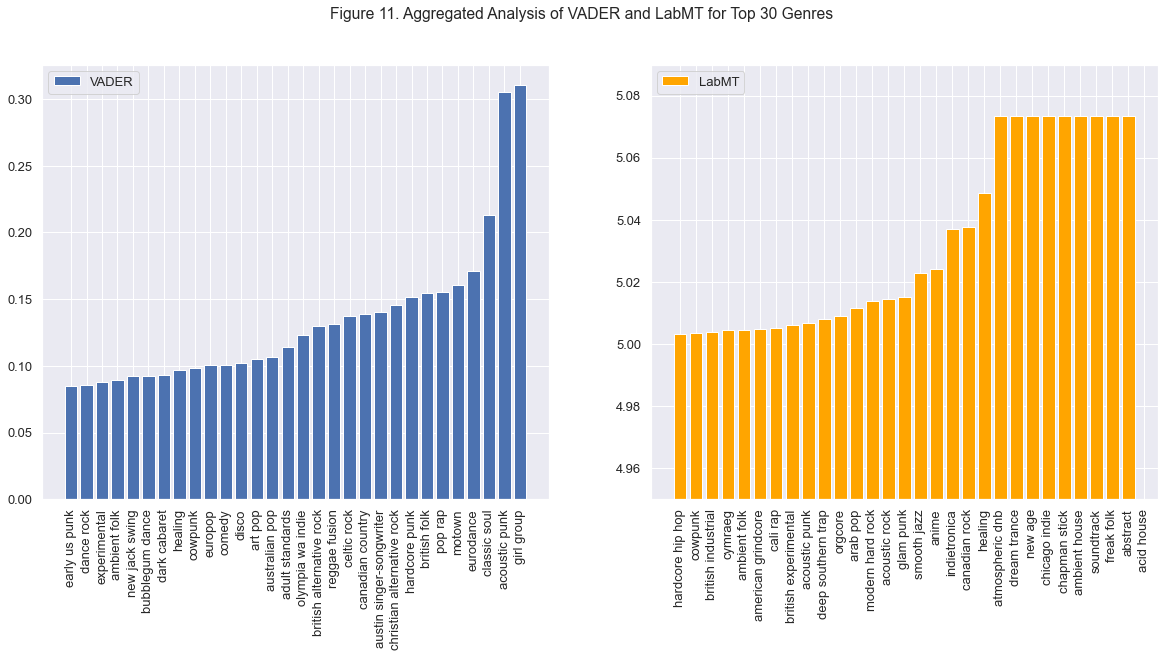

In [27]:
#sort artists by the associated genre and aggregate by the mean VADER sentiment
top_20_vader = df.groupby("artist_genre_picked")\
            .agg(sentiment=("sentiment_VADER", np.mean), std=("sentiment_VADER", np.std))\
            .sort_values("sentiment")[-30:]
#sort artists by the associated genre and aggregate by the mean LabMT sentiment
top_20_labmt = df.groupby("artist_genre_picked")\
            .agg(sentiment=("sentiment_LabMT", np.mean), std=("sentiment_LabMT", np.std))\
            .sort_values("sentiment")[-30:]
#bar plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
p1 = ax1.bar(top_20_vader.index, top_20_vader["sentiment"],label="VADER")
p2 = ax2.bar(top_20_labmt.index, top_20_labmt["sentiment"], label="LabMT", color='orange')
ax1.set_xticklabels(labels=top_20_vader.index, rotation=90)
ax2.set_xticklabels(labels=top_20_labmt.index, rotation=90)
ax2.set_ylim(4.95, 5.09)
ax1.legend()
ax2.legend()
plt.suptitle("Figure 11. Aggregated Analysis of VADER and LabMT for Top 30 Genres")
plt.show()

Next, we move onto analyzing the average sentiment per genre. To do so, we filtered our network for the top 30 most artists by sentiment score (artists represent the nodes in our network) and we extracted their associated genres. In Figure 11, we notice that some genres, such as ambient house and indie have a higher sentiment score than the others, such as hip-hop and punk. Considering that girl groups have met a wide success in the 90's, with famous bands such as Destiny's Child and Spicy Girls, it is no surprise that the genre is associated with very happy sentiments. 

Due to the polarity of the VADER sentiments which range between -1 and 1, Figure 13a) captures the wide spectrum of genre, ranging from punk (leftmost on th x-axis) to girl group (rightmost on the x-axis). LabMT captures a wide range as well, but less polarized, with hardcore hiphop on one extreme and fold and ambient house on the positive extreme. Overall, based on our analysis so far, we believe LabMT has a more robust method of analyzing sentiments compared to VADER, which is why we will be moving forward to analyzing our data only with LabMT. 

This analysis gives us insights into how polarizing certain genres are and set the stage for future analysis. 


/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


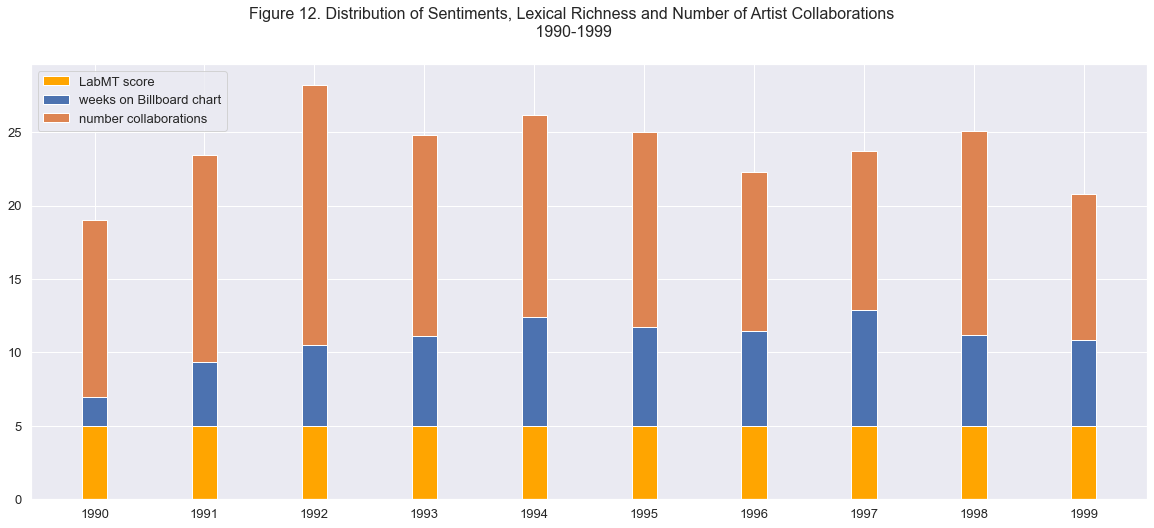

In [28]:
#sort artists by year and aggregate by the mean sentment
df_sentiment = df.groupby([df.year])['sentiment_LabMT', "len_collabs", "weeks_on_chart"].mean()
#stacked bar plot
fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(df_sentiment))
width = 0.23
plt.bar(df_sentiment.index, df_sentiment['sentiment_LabMT'],width = width, label="LabMT score", color="orange")
plt.bar(df_sentiment.index, df_sentiment['weeks_on_chart'],width = width, label="weeks on Billboard chart", bottom =df_sentiment['sentiment_LabMT'])
plt.bar(df_sentiment.index, df_sentiment['len_collabs'],width = width, label="number collaborations", bottom =df_sentiment['sentiment_LabMT']+ df_sentiment['weeks_on_chart'])
plt.xticks(df_sentiment.index)
plt.suptitle("Figure 12. Distribution of Sentiments, Lexical Richness and Number of Artist Collaborations\n 1990-1999", fontsize=16)
plt.legend()
plt.show()


In Figure 12, we observe a combined analysis of the LabMT score, number of on the Billboard chart and number of collaborations, aggregated per year.We notice that while the number of collaborations peaked in 1993, the cummulative number of weeks on chart ranked the highest in 1997.While the mean LabMT sentiment does not give us too much insight due to the low variation, the relationship between the 3 indicators is interesting to explore further.

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


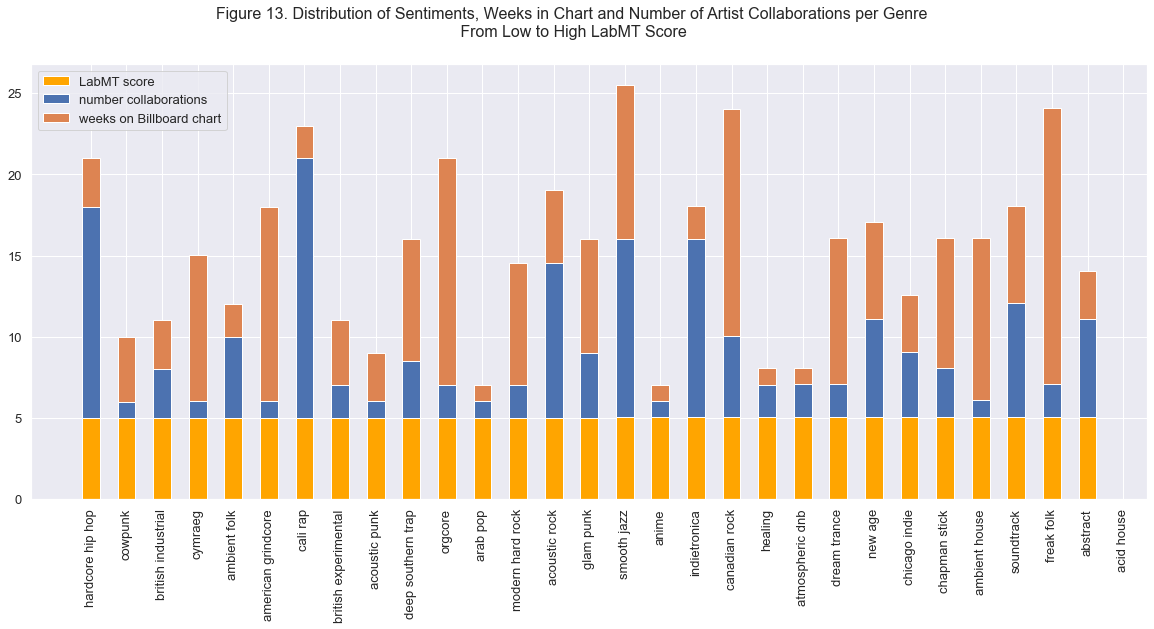

In [29]:
#sort artists by associated genre and aggregate by the mean LabMT sentiment
#select the top 30 
df_sentiment_genre = df.groupby([df.artist_genre_picked])['sentiment_LabMT', "len_collabs", "weeks_on_chart", "lex_richness"].mean().sort_values("sentiment_LabMT")[-30:]
#stacked bar plot
fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(df_sentiment_genre))
width = 0.5

means_sent = np.array(df_sentiment_genre['sentiment_LabMT'])
means_collabs = np.array(df_sentiment_genre['len_collabs'])
means_lex =np.array(df_sentiment_genre['lex_richness'])
means_chart=np.array(df_sentiment_genre['weeks_on_chart'])
plt.bar(df_sentiment_genre.index, means_sent, width = width, label="LabMT score", color="orange")
plt.bar(df_sentiment_genre.index, means_collabs,width = width, label="number collaborations", bottom=means_sent)
plt.bar(df_sentiment_genre.index, means_chart,  width = width, label="weeks on Billboard chart", bottom=means_collabs+means_sent)

ax.set_xticklabels(labels=df_sentiment_genre.index, rotation=90)
plt.suptitle("Figure 13. Distribution of Sentiments, Weeks in Chart and Number of Artist Collaborations per Genre\n From Low to High LabMT Score", fontsize=16)
plt.legend()
plt.show()


Figure 13 presents an overview of the distribution of the same indicators as in Figure 12, this time in an aggregated manner by genre. The plot in Figure 13 presents interesting findings, indicating that specific genres such as hip-hop, rap and acoustic rock are more prone to a higher number of collaborations, as well as a higher number of average weeks in chart. The plotted dataframe is sorted by the average sentiment, from left to right on the x-axis, suggesting that, across the board, a higher sentiment score may be correlated with a larger number of collaborations and weeks in chart and that it may be genre-specific. We will analyze the relatonship between sentiment, number of collaborations and weeks on the Billboard chart further in section 3.2.2.

### 3.2.2. Average Sentiment per Community 
In order to further quantify our findings, we partitioned our network into the best communities using the Louvain algorithm. The partition resulted in 14 communities, which we named by the dominant genre of the top 3 connected artists. Furthermore, we averaged the LabMT sentiment score for each community.

In [30]:
# load network
with open("project/G_sa.pickle", 'rb') as f:  
    G = pickle.load(f)
#remove the weekly connected components
LC = max(nx.weakly_connected_components(G), key=len)
# Save only the largest component as G
GG = nx.DiGraph(G.subgraph(LC))
# undirected graph
G_u = GG.to_undirected()
#returns a dictionary with the names of the artist and the assignedc community
partition_ids = community_louvain.best_partition(G_u)
#keep only artists in the partition ids
keep_artists = {k for k in df["Artist"] if k in partition_ids.keys()}
df= df[df["Artist"].isin(keep_artists)]

In [31]:
#name the partitions with the names of the top 3 artists
partition_id_to_name = {partition_id: partition_to_top3_names(G_u, partition_ids, partition_id)
                        for partition_id in set(partition_ids.values())}
df["community"] = df["Artist"].apply(lambda name: partition_id_to_name[partition_ids[name]])
#dictionaries
dict_genre_artist = {x: y for x, y in zip(df["Artist"], df["artist_genre_picked"])}
dict_genre_label = {x: y for x, y in zip(df["Artist"], df["label"])}
#find the dominant genre of the top 3 artists per community
df["community_genre"] = df["community"].apply(lambda community: return_genre(community, dict_genre_artist))
# Dataframe for the average sentiment in Vader and LabMT for each community
community_to_avg_sentiments = [{"community": community[0],
                                "community_genre": community[1],
                                "collaborations": df_comm["len_collabs"].mean(),
                                "lexical_richness": df_comm["lex_richness"].mean(),
                                "weeks in chart": round(df_comm["weeks_on_chart"].mean(), 2),
                                "peak_rank": round(df_comm["peak_rank"].mean(), 2),
                                "avg VADER sentiment": round(df_comm["sentiment_VADER"].mean(), 3),
                                "avg LabMT sentiment": round(df_comm["sentiment_LabMT"].mean(), 3)}
                               for community, df_comm 
                               in df.groupby(["community", "community_genre"])]
#create dataframe
community_to_avg_sentiments = pd.DataFrame(community_to_avg_sentiments).sort_values("avg VADER sentiment", ascending=False)
#add missing value
community_to_avg_sentiments["community_genre"] = community_to_avg_sentiments["community_genre"].replace(['alternative pop', '', 'alternative hip hop', 'alternative rock',
       'celtic new age disco house', 'canadian pop  ', '', '',
       'ambient alternative rock finnish metal', 'alternative metal  ',
       'hard rock', 'britpop boy band', 'latin pop bolero',
       'new wave pop  ', 'contemporary country country rock',
       'alternative rock'], ['alternative pop', '', 'alternative hip hop', 'alternative rock',
       'celtic new age disco house', 'canadian pop  ', 'rock', 'pop',
       'alternative rock finnish metal', 'alternative metal  ',
       'hard rock', 'britpop boy band', 'latin pop bolero',
       'new wave pop  ', 'contemporary country rock',
       'alternative rock'])

No handles with labels found to put in legend.


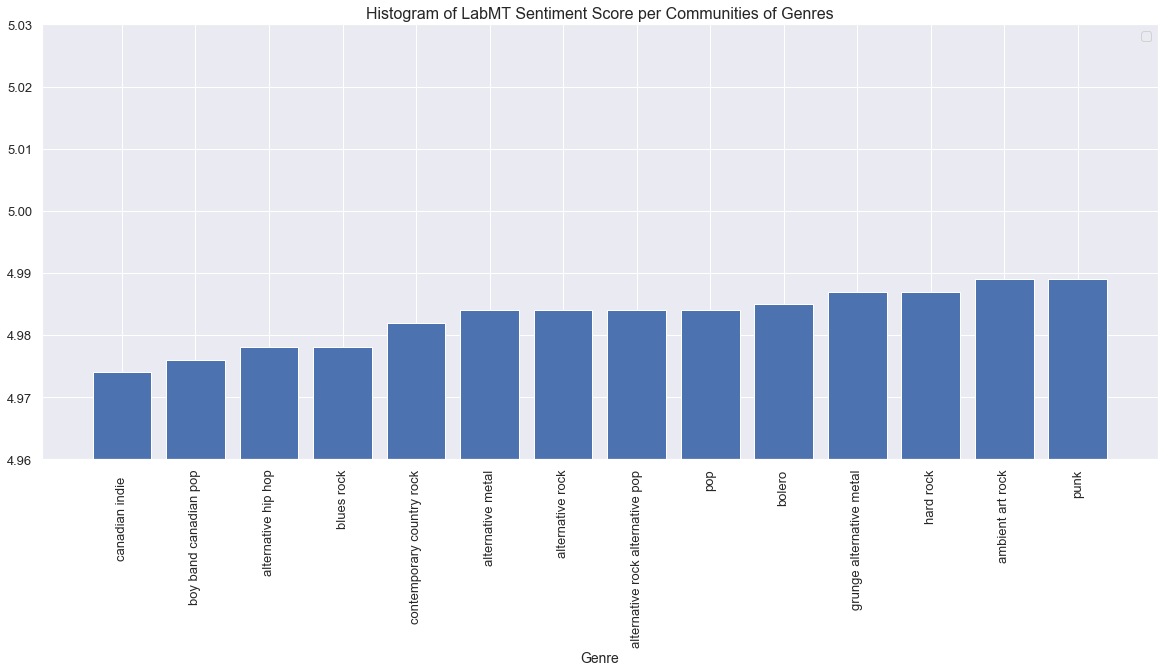

In [32]:
#sort communities by the communty genre and aggregate by the mean LabMT score
comm_genre = community_to_avg_sentiments.groupby("community_genre")\
            .agg(LabMT=("avg LabMT sentiment", np.mean), std=("avg LabMT sentiment", np.std))\
            .sort_values("LabMT")
#bar plot
fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(community_to_avg_sentiments))
width = 0.5
plt.bar(x=comm_genre.index, height = comm_genre["LabMT"])
plt.xlabel("Genre")
#plt.title("Figure 14. Histogram of LabMT Sentiment Score per Communities of Genres", fontsize=16)
plt.title("Histogram of LabMT Sentiment Score per Communities of Genres", fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.ylim(4.96, 5.03)
plt.show()

Figure 14 indicates the histogram of the LabMT sentiment score per communities of genres. We can notice that based on this plot, the communities where latino and alternative pop are the dominant genres have the most positive sentiment score, followed by alternatve hip-hop and disco house. 

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


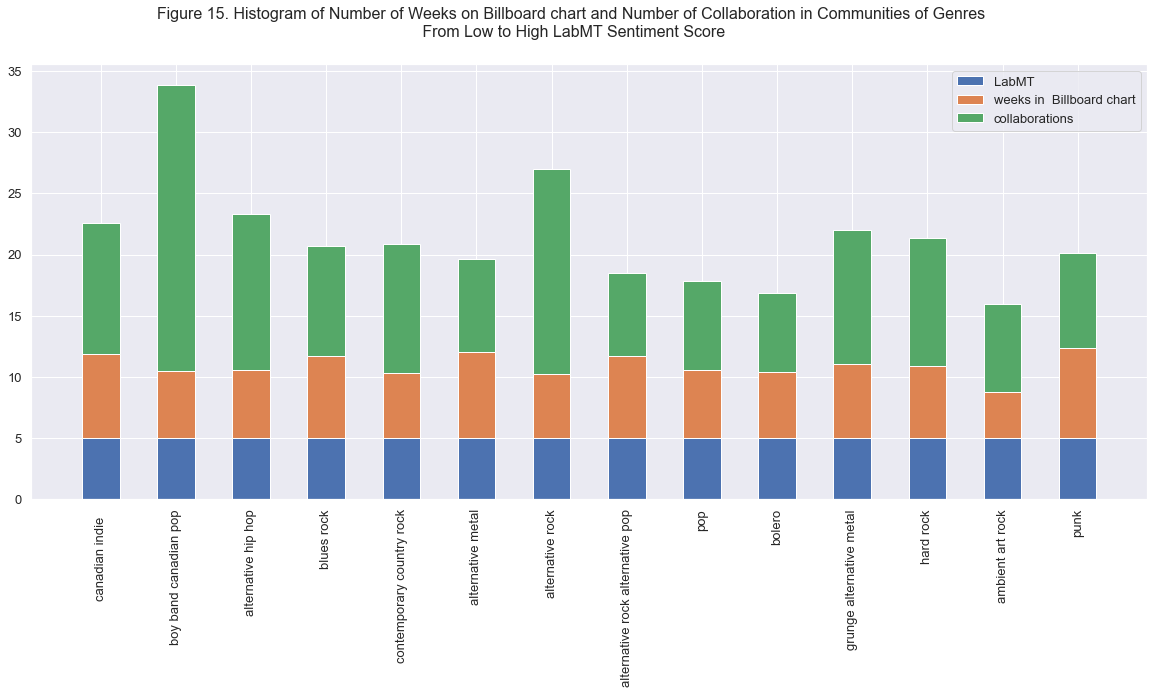

In [33]:
#sort communities by the communty genre and aggregate by the mean LabMT score
comm_genre = community_to_avg_sentiments.groupby("community_genre")["avg VADER sentiment","avg LabMT sentiment", "lexical_richness", "collaborations", "weeks in chart", "peak_rank"]\
            .agg(np.mean)\
            .sort_values("avg LabMT sentiment")
#bar plot
fig, ax = plt.subplots(1,1, figsize=(20,8))
X_axis = np.arange(len(community_to_avg_sentiments))
width = 0.5
plt.bar(comm_genre.index, comm_genre['avg LabMT sentiment'],width = width, label="LabMT")
plt.bar(comm_genre.index, np.array(comm_genre["weeks in chart"]),width = width, label="weeks in  Billboard chart", bottom=comm_genre['avg LabMT sentiment'])
plt.bar(comm_genre.index, np.array(comm_genre['collaborations']),width = width, label="collaborations", bottom=np.array(comm_genre["weeks in chart"]+comm_genre['avg LabMT sentiment']))
plt.suptitle("Figure 15. Histogram of Number of Weeks on Billboard chart and Number of Collaboration in Communities of Genres\n From Low to High LabMT Sentiment Score", fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()


In Figure 15, we examined the relationship between average sentiment per community and the number of collaborations, as well as the number of weeks on the Billboard chart. The plot indicates that the most negative communities of genres (the leftmost ones) have a slightly higher number of collaborations compared to the most positive ones. However, it may be difficult to make such a statement by looking only at the communities of genres. That is why we will continue our analysis by trying to determine whether the number of collaborations and the number of weeks on chart are indeed measures of success for popular artists.

### 3.2.3. Analysis of the Top 30 Most Popular Artists by Sentiment, Genre, Number of collaborations and Number of weeks in the Billboard chart.
Next, we went onto analyzing if the top 30 artists by the number of weeks in the Billboard chart and their corresponding genre, in relation to their sentiment score, the number of collaborations and the number of weeks in the Billboard chart.

In [34]:
##sort by the artists' associated genre and aggregate by the mean top 30 artists, sorted by the number of weeks in chart
top_50 = df.groupby("artist_genre_picked")["Artist", "len_collabs","weeks_on_chart", "lex_richness", "instrumentalness", "sentiment_LabMT"]\
            .agg(np.mean)\
            .sort_values("weeks_on_chart", ascending=False)[:30]
top_50 = top_50.fillna("rock")
top_50 = top_50.reset_index()
top_50 = top_50.replace("c86", "indie pop")


/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


No handles with labels found to put in legend.


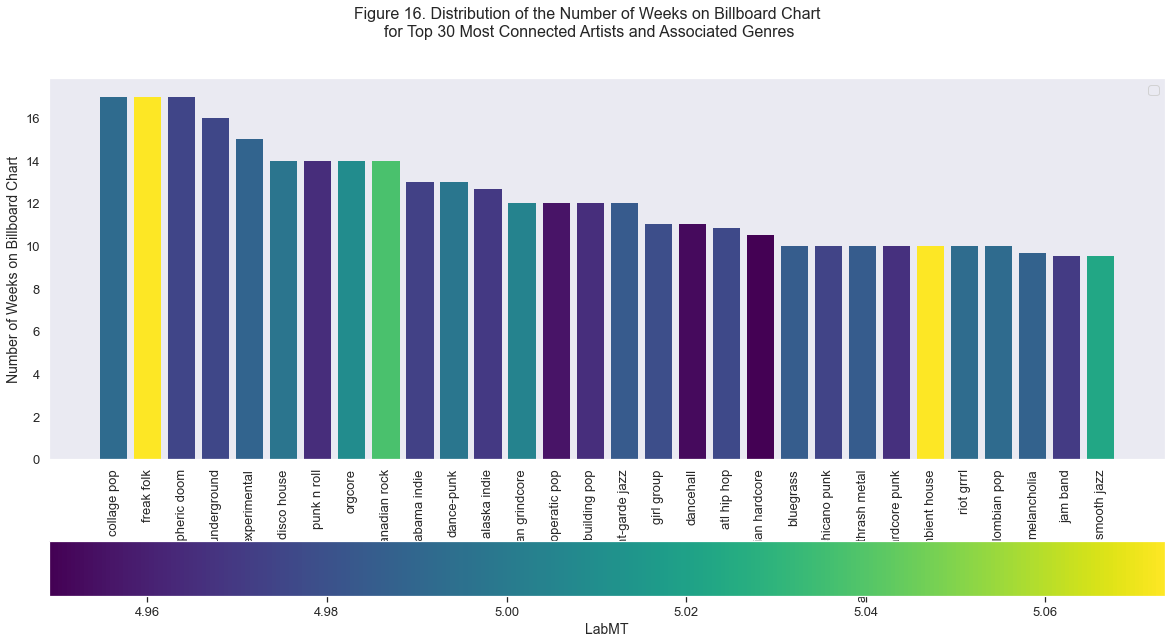

In [35]:
plot_colorbar(top_50, 
              x="artist_genre_picked", 
              y="weeks_on_chart", 
              ylabel="Number of Weeks on Billboard Chart", 
              title="Figure 16. Distribution of the Number of Weeks on Billboard Chart \nfor Top 30 Most Connected Artists and Associated Genres", 
              index=False,
              cb_orientation="horizontal",
              color="sentiment_LabMT")



The plot in Figure 16 presents a distribution of the number of weeks in the Billboard chart by top 30 most connected artists and associated genres. The colorbar at the bottom indicates the LabMT sentiment score colored from the most negative (purple) to the most positive (yellow) one. We notice that the genres with the largest cummulative number of weeks on chart have an overall neutral to more negative sentiment with the expcetion of "freak folk" which stands out as being surprisingly positive. However, the number of weeks on chart seem to be quite uniformly distributed for the top 30 artists, being in the range of 11 to 15. 

No handles with labels found to put in legend.


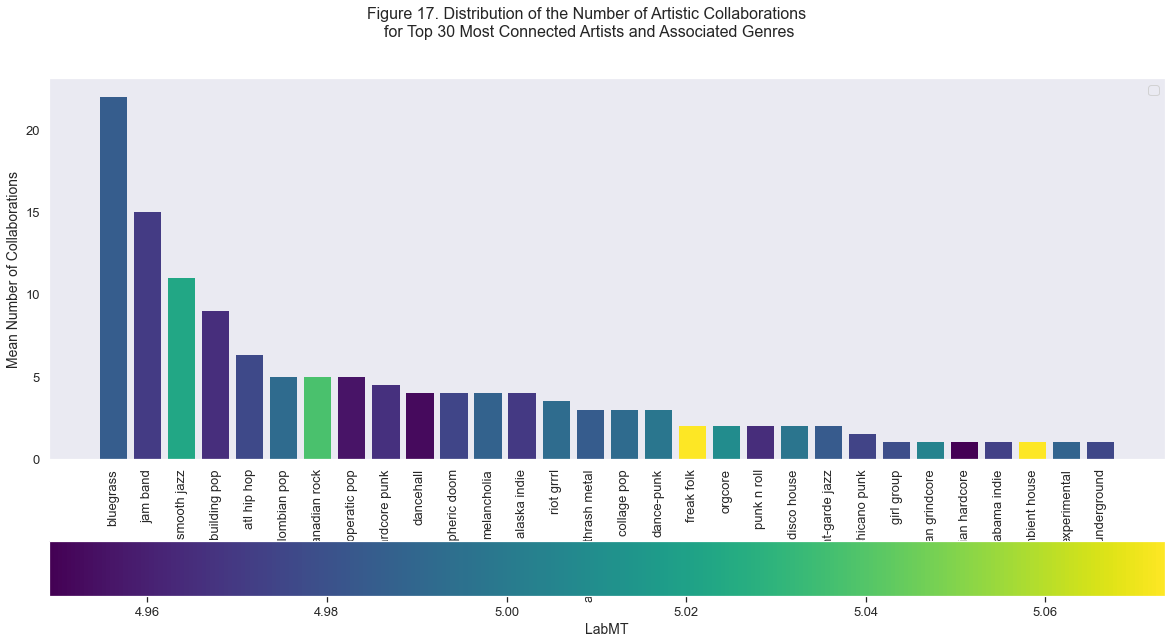

In [36]:
top_50 = top_50.sort_values("len_collabs", ascending=False)[:30]
top_50 = top_50.reset_index()
plot_colorbar(top_50, 
              x="artist_genre_picked", 
              y="len_collabs", 
              ylabel="Mean Number of Collaborations", 
              title="Figure 17. Distribution of the Number of Artistic Collaborations \nfor Top 30 Most Connected Artists and Associated Genres", 
              index=False,
              cb_orientation="horizontal",
              color="sentiment_LabMT")


The plot in Figure 17 presents a distribution of the number of collaborations for the top 30 most connected artists and associated genres. We notice that even among the top 30 most popular artists, there is a large variability in the plot, between the genres with the highest largest number of collaborations – jam band, smooth jazz, pop, hip-hop - and the rest, which are in the range of 1-2 collaborations. Based on the sentiment score, the genres happen to be on the negative to neutral spectrum. From Fig. 16 and 17, we can conclude that the top 30 most popular artists have a relatively large number of weeks in chart, they do not have a significantly large number of collaborations. 

One more indicator which we have not taken into consideration before is the lexical richness, which refers to the ratio of different unique word stems (types) to the total number of words (tokens). The plot in Figure 18 indicates that there is a positive correlation between the sentiment score and the mean lexical richness per genre. For example, ambient house and freak folk, associated with a higher lexical richness, score also high on the LabMT bar.

No handles with labels found to put in legend.


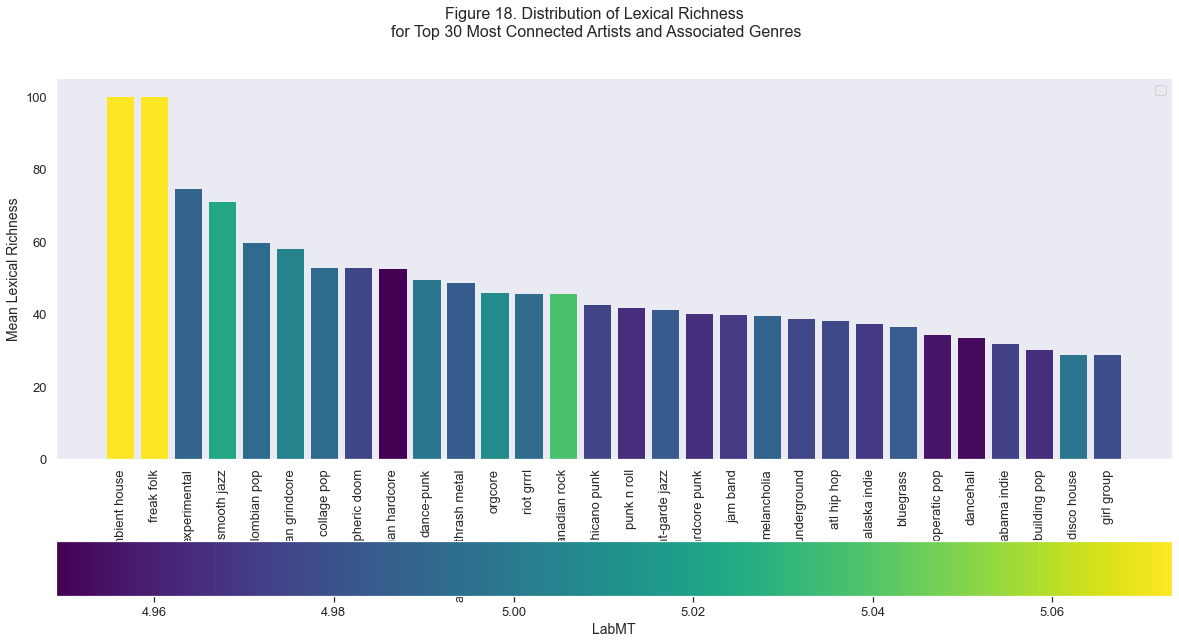

In [37]:
top_50 = top_50.sort_values("lex_richness", ascending=False)[:30]
top_50 = top_50.reset_index()
plot_colorbar(top_50, 
              x="artist_genre_picked", 
              y="lex_richness", 
              ylabel="Mean Lexical Richness", 
              title="Figure 18. Distribution of Lexical Richness \nfor Top 30 Most Connected Artists and Associated Genres", 
              index=False,
              cb_orientation="horizontal",
              color="sentiment_LabMT")


All in all, from the analysis of part 3.2.1, we can conclude that genres such as hip hop, cal rap, southers trap, smooth jazz, soundtrack, trance are more prone to a larger number of collaborations and a greater number of weeks in chart and they are associated with a lower to neutral sentiment compared to the others. From the analysis of part 3.2.2, of the communities of genres, we can infer that communities where the dominant genres are: britpop boy bands, alternative pop, alternative rock have a greater number of collaborations, but they are not necessarily associated with a specific sentiment. From the analysis of part 3.2.3 of the top 30 artists by popularity, we can infer the following: genres which we analyzed before in part 3.2.1 such as dancehall, smooth jazz, disco jazz, have a high number of colllabs and lower sentiment score; genres such as girl(boy) bands have a lower number of colllabs and a lower sentiment score. 

Put in perspective, we find that the interplay between sentiment score, lexical richness, weeks on chart and the number of collaborations may be statistically significant. That is why we further examined the distribution of these features and their Kernel Density Estimations in a pairplot. 

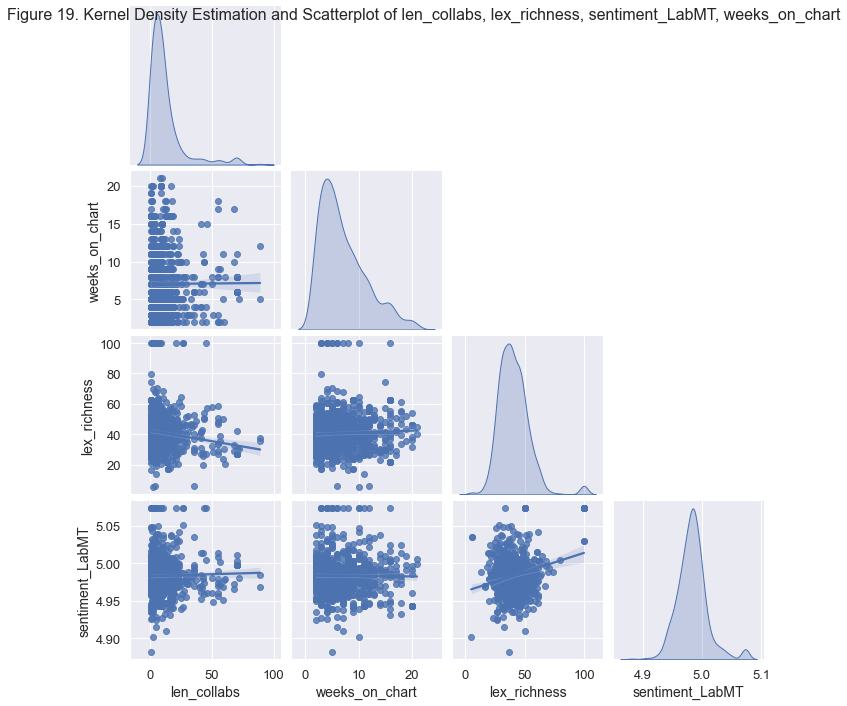

In [38]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
sns.pairplot(df[["len_collabs", "weeks_on_chart", "lex_richness", "sentiment_LabMT"]], kind='reg', diag_kind='kde', corner=True)
plt.suptitle("Figure 19. Kernel Density Estimation and Scatterplot of len_collabs, lex_richness, sentiment_LabMT, weeks_on_chart", fontsize=16)
plt.show()

If there is something which we can infer from the plots above is that the only significant correlation seems between sentiment and lexical richness seems. Slightly does the correlation between sentiment and the number of collabs seems to be positively correlated. That being concluded, we expect that the sentiment plays a small role in the prediction of an artists' collaborations or number of weeks on chart.

In order to investigate what factors influence the number of collaborations, for part 3.3, we decided to run a regression model.

### 3.3 Machine Learning Predictions

Thoughout our analysis, we determined that the weeks of the Billboard chart are the main indicator in our network for predicting an artist's success. In this section, we would like to investigate the factors which influence the weeks on chart. That is why we create a linear regression model which will predict weeks on charts based on a number of nodes features. Based on our previous analysis, our expectation is that we will find a strong correlation between the number of weeks on chart and the number of collaborations. 

#### 3.3.1. Dataset 
For the regression part, we built a training set from an undirected graph describing interaction between artists limited to years 1990-1995. The test set is analogous, but for years 1995-2000. We use twice as many negative class examples (without connection between artists) as of the positive class examples. Effectively, our tests consist of 11223 samples in training set and 15138 in the test set. Additionally, to make a more realistic evaluation, which takes into account severe dataset imbalance, we create a random connection sample from the test graph consisting of 10000 samples.

That being said, the features included in our network are: sentiment, out-degree, in-degree, tempo, valence, liveness, instrumentalness, acousticness, speechiness, mode, loudness, energy, danceability. It is worth mentioning that the in-degrees of our network represent the albums in which an artists is referenced to, while the out-degrees are the outgoing references to the albums that had been released by the artists himself (As a side note, we occasionally notice occurences of artists that were not active in the 90's, but were relevant to this time and were referred to by others artists). Therefore, the total number of collaborations is represented by the sum of the in and out-degrees.

#### 3.3.3. Model
For the sake of simplicity and ability to understand models prediction we use Ridge Regression, which is a regularized version of Linear Regression, for which we used an alpha coefficient of 1e-10. 

<!-- It defines the posterior probability of a positive class $C_1$ (existing connection between nodes in case of this project) as:

$$
p(C_1|\theta) = y(\theta) = \sigma(\textbf{w}^T\theta)
$$

where $p(C_2|\theta) = 1 - p(C_1|\theta)$ . $\sigma()$ is a logistic function, which for any real input returns value in $[0, 1]$[5].

In order to obtain a decision we set a boundary at 0.5, which results in prediction $t = 1$ for $p(C_1|\theta) > 0$, otherwise $t=0$.

The weight vector $\textbf{w}$ represents the magnitue and direction on the classification each of the input features has. -->

#### 3.3.4. Method
We standardized our input using a standard scaler and we applied a Ridge regressor. We trained our model on our training set and we evaluated it on both our training and test set. The result of the prediction is evaluated using a Pearson correlation test: r = 0.899, p-value=0 (Figure 20). This result indicates that there is in fact, a linear relationship between our features and the number of weeks on chart, our target. Next, we conducted an analysis of the most important features in our input (Figure 21).

In [39]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', Ridge(alpha=1e-10))])

train_range = pd.date_range(start='1/01/1990', end='1/01/1995')
test_range = pd.date_range(start='1/01/1995', end='1/01/2001')

G_train = build_network(date_range=train_range)
G_test = build_network(date_range=test_range)

model, feature_names = train_success(pipeline, G_train)

/Users/dariazahaleanu/Desktop/Fall2021/Final_SG/SocialGraphs/project/predictor/train.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', c="red", alpha=0.6)


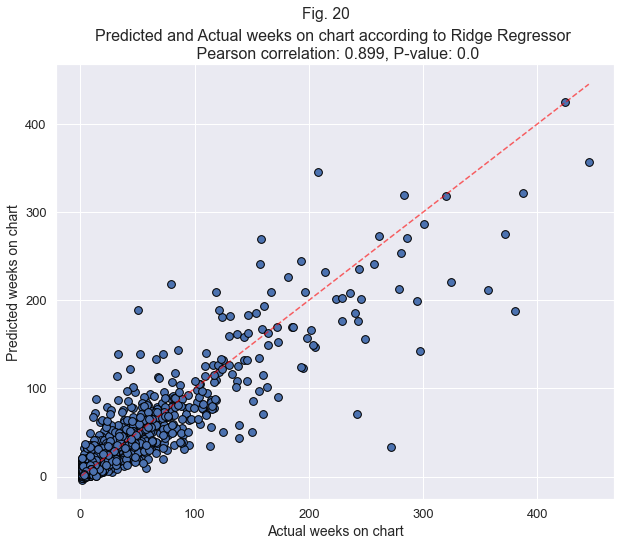

/Users/dariazahaleanu/Desktop/Fall2021/Final_SG/SocialGraphs/project/predictor/train.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', c="red", alpha=0.6)


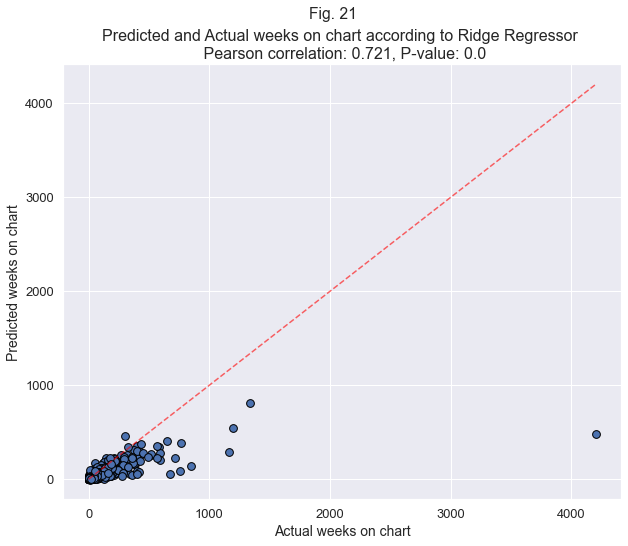

In [40]:
train_eval = evaluate(model, G_train, random_dataset=False, success=True, title="Fig. 20")
test_eval = evaluate(model, G_test, random_dataset=False, success=True, title="Fig. 21")

Figure 20 presents the result of the evaluation of our model on the training set (r=0.899, p=0), while Figure 21 presents the result of the evaluation of our model on the test set (r=0.721, p=0). Both results indicate a strong correlation between the input features and target. The value of the coefficients and the MSE can be seen in the table below:

In [41]:
result_df = pd.DataFrame([train_eval, test_eval], index=["train", "test"])
result_df

mse  corr  p-value
train    516.135589  0.90      0.0
test   12131.147664  0.72      0.0

Next, we conducted an analysis of the most important features in our input. 

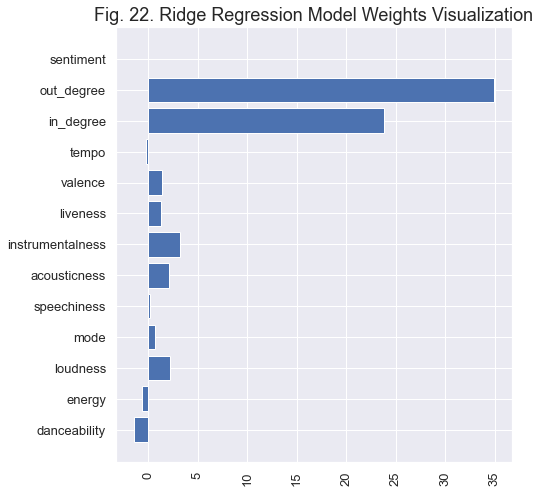

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.barh(feature_names, model[1].coef_)
plt.title("Fig. 22. Ridge Regression Model Weights Visualization")
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(left=0.35)
plt.show()

Figure 22 presents an overview of it and as expected, the in- and out-degrees are the most significant features. As expected from the Sentiment Analysis part, the sentiment has little to no influence on the prediction of the number of weeks on chart.

#### 3.3.5.  Predicting the Collaboration Between Artists

Furthermore, we want to go deeper and attempt to predict the collaboration based on features of a pair of artists. We model the connections within the graph using the artist-related dataset which we have described in the previous sections. Firstly, we craft a number of features, that later will be used as an input to a binary classifier.

We use data from all the data sources in order to create a vector representing interaction between two artists. The first step to construct the dataset is to build a network object with node attributes from auxiliary datasets. Then, for each pair, we define a target variable as a binary value, which has value 1 if there is a connection between two artists and 0 otherwise.

The predictor variables list consists of the followng:
- *{audio_feature}\_difference*: for each Spotify's audio feature we compute an absolute difference between each nodes
- *{audio_feature}\_sum*: for each Spotify's audio feature we compute a sum both nodes
- *in_degree_difference* and *out_degree_difference* - difference between graph in and out degrees
- *in_degree_sum* and *out_degree_sum* - sum of graph in and out degrees, which represent the number of artists' collaborations in our network
- *weeks_in_chart_diff* - difference between cummulative time that each artist or group spent on the Billboard charts
- *weeks_in_chart_sum* - sum of cummulative time that each artist or group spent on the Billboard charts (ie. if an artist has more than one album, we sum up the total number of weeks on chart)

Similarly to the linear prediction part, we build a training and test set. Then, we use a Logistic Regressor and we train it on our training dataset. We evaluate the model using three metrics: precision, recall and F1, which is the harmonic mean of the precision and recall, which can be seen in the table below.

<!-- #### 3.3.2. Dataset creation
We construct a training set from an undirected graph describing interaction between artists limited to years 1990-1995. Test set is analogous, but for years 1995-2000. We use twice as many negative class examples (without connection between artists) as of the positive class examples. Effectively, we have 11223 samples in training set and  15138 in test set.
Additionally, to make a more realistic evaluation, which would consider severe dataset imbalance, we also create a random connection sample from the test graph consisting of 10000 samples, out of which only about 14 are for connected nodes.

#### 3.3.3. Model
For the sake of simplicity and ability to understand models prediction we use Logistic Regression. It defines the posterior probability of a positive class $C_1$ (existing connection between nodes in case of this project) as:

$$
p(C_1|\theta) = y(\theta) = \sigma(\textbf{w}^T\theta)
$$

where $p(C_2|\theta) = 1 - p(C_1|\theta)$ . $\sigma()$ is a logistic function, which for any real input returns value in $[0, 1]$[5].

In order to obtain a decision we set a boundary at 0.5, which results in prediction $t = 1$ for $p(C_1|\theta) > 0$, otherwise $t=0$.

Weight vector $\textbf{w}$ represents what magnitue and direction on the classification each of the input features has.

#### 3.3.4. Training example
The following code snippet shows all steps required to obtain a trained model and its evaluation. -->

In [43]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression())])

train_range = pd.date_range(start='1/01/1990', end='1/01/1995')
test_range = pd.date_range(start='1/01/1995', end='1/01/2001')

G_train = build_network(date_range=train_range)
G_test = build_network(date_range=test_range)

model, feature_names = train(pipeline, G_train)


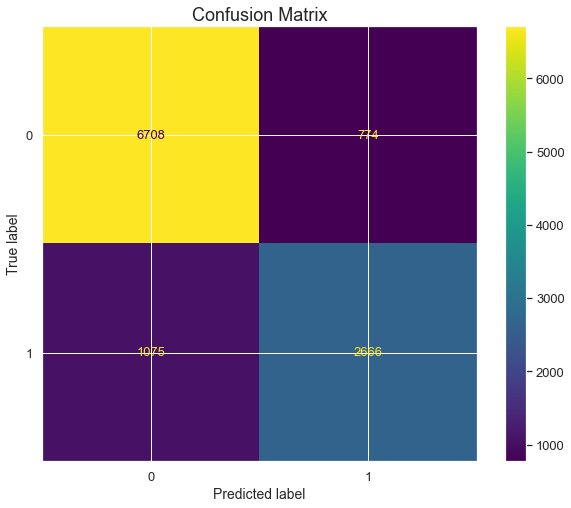

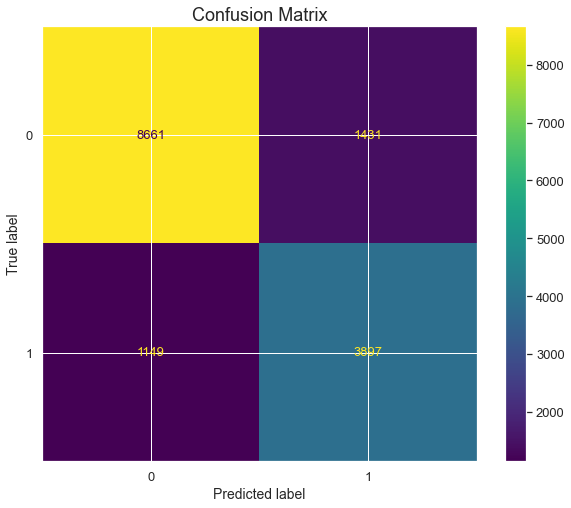

In [45]:
train_eval = evaluate(model, G_train, random_dataset=False, title="Fig. 23")
test_eval = evaluate(model, G_test, random_dataset=False, title="Fig. 24")


In [46]:
result_df = pd.DataFrame([train_eval, test_eval], index=["train", "test"])
plt.rcParams["figure.figsize"] = (13,13)
result_df

f1  precision    recall
train  0.810694   0.818439  0.804598
test   0.810833   0.807147  0.815250

As results show, the model is mostly predicting the connection correctly, hence we assume that models weights give us insight into how actual collaborations take place. Because all the inputs are standardized, we can compare the model weights directly. In general, we see that a positive weight would mean that a high value of said feature influences the chance of a connection between two nodes positively, while negative values behave oppositely. Feature weights close to 0 indicate that that feature does not contribute at all.

## 4. Discussion

### 4.1 Main Findings

Some of our main findings can be summarized below:
1. We identified a positive correlation between weeks on chart and number of collaborations. 
2. A timeline analysis of the Spotify attributes indicated that around Christmas time, there is a peak in instrumentnalness, speechiness and acousticness.
3. Genres such as hiphop, cal rap, southers trap, smooth jazz, soundtrack, trance are more prone to a larger number of collaborations and a greater number of weeks on chart and they are associated with a lower to neutral sentiment compared to the others.
4. Based on the regression model analysis using the Ridge regressor, we were able to predict the number of weeks on chart based on a number of coefficients. The result of our evaluation was a Ridge regression with a Pearson coefficient of 0.72 on our test set, which indicates a strong correlation between features such as sentiment, out-degree, in-degree, tempo, valence, liveness, instrumentalness, acousticness, speechiness, mode, loudness, energy, danceability and our target, the number of weeks on chart.
5. The ranking of the coefficients importance indicated that the number of collaborations represented by the sum of in and out-degrees is the most important coefficient in our model. 
6. There are two main outtakes: the bigger difference between sound styles of two artists, the smaller the chance of them collaborating, also it helps that both artists have already been on the charts. The more, the better for the collaboration chances.


### 4.2. Shortcomings
Overall, our analysis helped us draw some interesting findings. However, in terms of further work, there are a number of things which can be improved and further analyzed. For the Spotify attributes section, a more thorough analysis of the timeline plots could help us understanding better the fluctuation of attributes such s tempo, liveness, acousticness over time. For the sentiment analysis part, one aspect which we did not fully explore was the analysis of the sentiments aggregated per year. It is expected that the sentiment fluctuates over the time is influenced by the number of collaborations and the number of weeks in the Billboard chart. Furthermore, more is to be done in regards to the fine-tuning of the machine learning models (ie. adjusting some of the parameters of the ridge regression) and the evaluation of our dataset on potentially better machine learning models, such as the Random Forest Regressor or Elastic Net.


### 4.3. Further Work 
In terms of further work, these are a number of features which we like to add to our project:
1. Make an interactive plotting tool, which allows users to select the timeframe (months, years) for which they want to look into the attributes such as mean sentiment score, mean number of collaborations etc.
2. Design a web app which can determine the likelihood of success over time based on a number of factors (label, albums released, number of collaborations)


## 5. Contributions. 
A breakdown of our contributions can be seen below. The **first** person listed for each section was the main contributor:

Project idea brainstorming - all\
Wikipedia data collection - Artur, Daria\
Lyrics collection - Daria\
Spotify data collection - Nikolaj\
Spotify data analysis - Nikolaj\
Building the network - Artur\
Word Clouds - Nikolaj\
Sentiment analysis - Daria\
Machine learning predictions - Artur, Daria\
Explainer notebook - all\
Website - all


## 6. References.  

1. Przybysz, A., Zahaleanu, D., Espinoza, N. (2021, December 9). Project Github Repository. Retrieved from https://github.com/daz261/SocialGraphs .

2. Tang, S. (2015, September 5). Visualizing artist collaborations in the Billboard top 10 songs. Medium. Retrieved December 8, 2021, from https://medium.com/fun-with-data-and-stats/visualizing-artist-collaborations-in-the-billboard-top-10-songs-ff6188a0f57b. 

3. Gopalan, N. (2021, February 5). 90s music: What defines the decade that doesn't fit?: Udiscover. uDiscover Music. Retrieved December 8, 2021, from https://www.udiscovermusic.com/stories/90s-music/. 

3. Kyra Balenzano, Evan Feder, David Yuan. (n.d.). 36-315 Final Project. A Visual Analysis of Top Spotify Song Data. Retrieved from http://www.stat.cmu.edu/capstoneresearch/spring2020/315files/team3.html. 

4. Viner, J. (2021, March 13). What makes a hit song: Analyzing data from the Billboard hot 100 chart. Medium. Retrieved December 8, 2021, from https://joshdviner.medium.com/what-makes-a-hit-song-analyzing-data-from-the-billboard-hot-100-chart-74c1d5ad3fa3. 



